# **Project Name**    - Rosamann Retails Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Member 1 -**  - Jayesh Prakash Dahiwale


# **Project Summary -**

**Rossmann operates over 3,000 drug stores in 7 european countries. So our porject aim is to predict their daily sales for upto six weeks in advance. Stores sales are influenced by many factors, including promotions, competitions,school and state holidays, seasonality and locality. So In this project we have been provided the data from 1,500 Rossmann stores. So our task is to forecast the "Sales" column for the test** 
##<p>Provided there are two datasets, one is **Store** dataset having <b>1,115</b> observations in it with <b>10</b> columns and It gives us static information about each store such as the model and assortment of the store, information about the nearest competitor store, and whether or not they participate in the consecutive promotion "Promo2". Largely we're looking at numerical and date data, but Store Type and Assortment are flagged with letters to indicate store models and assorment level, per the variable explanations, as well as the PromoInterval column listing abbreviated months.</p>
## <p>Other datatset is about **Sales** dataset having <b>1,017,209</b> observations in it with <b>9</b> columns and It gives us static information about each store such as the model and assortment of the store, information about the nearest competitor store, and whether or not they participate in the consecutive promotion "Promo2". Largely we're looking at numerical and date data, but Store Type and Assortment are flagged with letters to indicate store models and assorment level, per the variable explanations, as well as the PromoInterval column listing abbreviated months.</p>

# **GitHub Link -**

https://github.com/Jayeshdahiwale/RegressionCapstoneProjectII

# **DataSet Link -**


Dataset DriveLink:https://drive.google.com/drive/folders/1XtTzgmtM-e9jGHbIq8pLzIbo3C8NF1T2?usp=share_link



## **Questions for analysis are as follows**
**1) Visualising the distribution of "Sales" & "Customers"?**<br>
**2) Statistics of Sales column ?** <br>
**3) Which rows are unnecessary and need to be removed ??** <br>
**4) What are the outliers ?** <br>
**5) Establishing relationship between Sales and Customers ?** <br>
**6) How stores are performing in Sales by month based on Assortment type ?**<br>
**7) How UPT metric compares across stores of different assortment types ?**<br>
**8)Correlation between competition distance and UPT metric?**<br>
**9)Which linear regression model is best?**<br>




#### **Define Your Business Objective?**

Increase the number of sales by predicting the rates at at optimal rate and finding the best suitalbe condition which attract the customers thereby increasing the profit for the Drug Store.

# **Variable Explaination**

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

1. Store - **(nominal)** a unique ID for each store


2. Sales - **(discrete)** the number of transactions recorded at the store that day


3. Customers - **(discrete)** the number of customers on a given day


4. Open - **(nominal)** an indicator for whether the store was open: 0 = closed, 1 = open


5. StateHoliday - **(nominal)** indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None


6. SchoolHoliday - **(nominal)** indicates if the (Store, Date) was affected by the closure of public schools


7. StoreType - **(nominal)** differentiates between 4 different store models: a, b, c, d


8. Assortment - **(nominal)** describes an assortment level: a = basic, b = extra, c = extended


9. CompetitionDistance - **(continuous)** distance in meters to the nearest competitor store


10. CompetitionOpenSince[Month/Year] **(discrete)** gives the approximate year and month of the time the nearest competitor store was opened


11. Promo - **(nominal)** indicates whether a store is running a promo on that day

12. Promo2 - **(nominal)** Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating


13. Promo2Since[Year/Week] - **(discrete)** describes the year and calendar week when the store started participating in Promo2


14. PromoInterval - **(ordinal)** describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


15. DayOfWeek - **(ordinal)** Day of the week, using 1-7 for Monday - Sunday respectively


16. Date - **Date** in YYYY-MM-DD

17. UPT - **(continuous)** Units Per Transaction, a calculated measure of the average number of items sold per transaction on a given day at a given store




(Rossmann Store Sales, 2015)

## **Importing the required packages**

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import math

We'll begin with the required libraries and reading our .csv files

In [ ]:
# mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading the dataset file
# dataset file googgle drive link : https://drive.google.com/file/d/185htr6OyxAZ0xb9QwxHpsUn8eTlq58v5/view?usp=share_link
working_directory_path = '/content/drive/MyDrive/MachineLearningAlmabetterJourney/Projects/CapstoneProject2/'



In [ ]:
store_lookup = pd.read_csv(working_directory_path + 'store.csv')

In [ ]:
sales_data = pd.read_csv(working_directory_path + 'Rossmann Stores Data.csv')


In [ ]:
store_lookup.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
store_lookup.shape

(1115, 10)

In [ ]:
store_lookup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
def null_cols(data):
  columns = data.columns
  null_cols = [(col,data[col].isna().sum()) for col in columns if data[col].isna().sum()!=0]
  return null_cols

In [ ]:
null_cols(store_lookup)

[('CompetitionDistance', 3),
 ('CompetitionOpenSinceMonth', 354),
 ('CompetitionOpenSinceYear', 354),
 ('Promo2SinceWeek', 544),
 ('Promo2SinceYear', 544),
 ('PromoInterval', 544)]

In [ ]:
pd.DataFrame(null_cols(store_lookup),columns=['ColumnName','Null_count'])

,ColumnName,Null_count
0,CompetitionDistance,3
1,CompetitionOpenSinceMonth,354
2,CompetitionOpenSinceYear,354
3,Promo2SinceWeek,544
4,Promo2SinceYear,544
5,PromoInterval,544


We can see in store lookup table there are total 6 null columns

In [ ]:
# Lets see the sales data
sales_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
sales_data.shape

(1017209, 9)

In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


These is no null columns in this dataset

In [ ]:
#lets see the starting date and end date of sales data
print(sales_data['Date'].min())
print(sales_data['Date'].max())

2013-01-01
2015-07-31


**Now we will merge the two data resources so we can more easily work with them. We will join the tables baes on the shared store column, which is a foreign key in the sales_data table and primary key in the stores_llokup table, so we'll validate the merge baed on this many to one relationship**

In [ ]:
merged_sales = sales_data.merge(store_lookup,how='left',on='Store',validate = 'many_to_one')

In [ ]:
merged_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:
merged_sales.shape

(1017209, 18)

In [ ]:
merged_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
merged_sales.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [ ]:
merged_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

**Lets check the skewness of columns i.e.** <br>
 "Day of Week","Sales","Customers","Competion Distance"

In [ ]:
merged_sales[['DayOfWeek','Sales','Customers','CompetitionDistance']].skew()

DayOfWeek              0.001593
Sales                  0.641460
Customers              1.598650
CompetitionDistance    2.928534
dtype: float64

we can see here competition distance,customers are positively skewed<br>


# **<p>Lets check the distribution bell peak using kurotsis</p>**

In [ ]:
merged_sales[['DayOfWeek','Sales','Customers','CompetitionDistance']].kurtosis()

DayOfWeek              -1.246873
Sales                   1.778375
Customers               7.091773
CompetitionDistance    13.000022
dtype: float64

We can see the that competition distance,and customers has highest peak...And sales and Day of week has negative kurtosis

# **Question 1: Visualising the distribution of Sales and Customer columns**

# **<p>Lets visualize the skewness and kurtosis</p>**

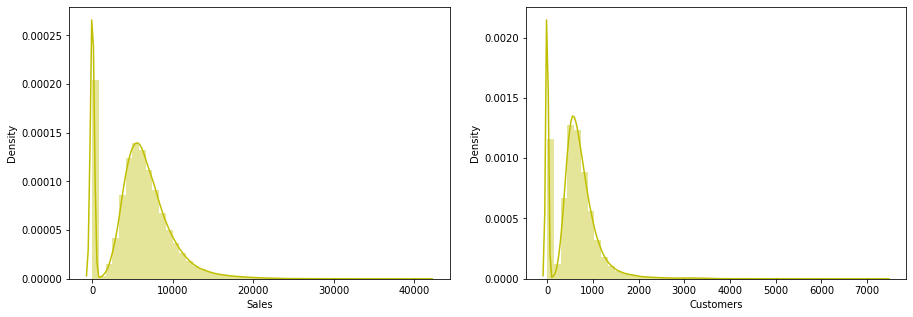

In [ ]:
fig,axes = plt.subplots(1,2)
sns.distplot(merged_sales['Sales'],color="y",ax=axes[0])
sns.distplot(merged_sales['Customers'],color="y",ax=axes[1])
fig.set_size_inches(15,5)

Histograms of our Sales and Customers values show us a positive skew and high kurtosis.

# **Question 2: Statistics of Sales column**

# <p>**Next we will take a closer look at our statistics for sales column.**</p>

In [ ]:
print("skew     " + str(round(merged_sales['Sales'].skew(),6)))
print("kurtosis " + str(round(merged_sales['Sales'].kurtosis(),6)))
print(merged_sales['Sales'].describe().round(3))
print("mode     " + str(merged_sales['Sales'].mode()))

skew     0.64146
kurtosis 1.778375
count    1017209.000
mean        5773.819
std         3849.926
min            0.000
25%         3727.000
50%         5744.000
75%         7856.000
max        41551.000
Name: Sales, dtype: float64
mode     0    0
dtype: int64


We can see our sales figures have a slightly positive skew, with the **mean (5773.819)** only slightly larger than the **median (5744.000)**, suggesting most outliers are to the right of the mean.

High kurtosis indicates it's **leptokurtic** with the likelihood of heavy tails and outliers that may be extreme. Considering our min and max values of **0** and **41,551** sales, we aren't surprised to see there may be some extreme outliers.

The max value well above the mean of 5,773.819 and outside the **standard deviation of 3849.926** helps us see how our mean ends up getting pulled slightly to the right for our positive skew.

There is no mode as we don't have any stores recording the exact same number of sales on any days, which isn't surprising.

# Data Cleaning

#<p>Datetime</p>

First we'll convert our Date column to datetime for easier filtering later on.

With an .info() call we can confirm our Date column was successfully converted to datetime.

We'll also expand our Date column into separate Month, Day of Month, and Year columns for easier filtering.

In [ ]:
merged_sales['Date'] = pd.to_datetime(merged_sales['Date'], format="%Y-%m-%d", errors='raise')

In [ ]:
merged_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [ ]:
merged_sales["Year"] = merged_sales["Date"].dt.year
merged_sales["Month"] = merged_sales["Date"].dt.month
merged_sales["DayOfMonth"] = merged_sales["Date"].dt.day

# **Duplicates**

We'll do a quick check for and delete any rows that are complete duplicates of another row, as we should only have one entry for each store and date.

In [ ]:
len(merged_sales[merged_sales.duplicated()])

0

# **Text and Expected Value**

In [ ]:
merged_sales.loc[merged_sales['StateHoliday']==0,'StateHoliday'] = '0'

Next we'll check our four columns that contain strings to make sure we have no inappropriately entered data. Using str.strip() to remove any accidental leading or trailing spaces.

In [ ]:
for col in merged_sales:
  
  if merged_sales[col].dtype == object and col != 'StateHoliday':
    merged_sales[col] = merged_sales[col].str.strip()

Next we'll look at value_counts for those columns and confirm only expected values are found.

In [ ]:
for col in merged_sales:
  if merged_sales[col].dtype==object:
    print(merged_sales[col].value_counts().sort_index())

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64
a    551627
b     15830
c    136840
d    312912
Name: StoreType, dtype: int64
a    537445
b      8294
c    471470
Name: Assortment, dtype: int64
Feb,May,Aug,Nov     118596
Jan,Apr,Jul,Oct     293122
Mar,Jun,Sept,Dec     97460
Name: PromoInterval, dtype: int64


In [ ]:
merged_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

Everything is looking as expected in our columns that contain text, and because each column only has 3-4 unique values we can see we don't need to worry about changing anything to lower, upper, or proper case.

We'll also do a quick check of columns we expect to only have a few unique values or binary flags, such as DayOfWeek or Promo, to make sure there's nothing unexpected there.

In [ ]:
check_cols = [ 'Open', 'Promo', 'Promo2', 'SchoolHoliday',  'DayOfWeek', 'CompetitionOpenSinceMonth',  'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']
for col in check_cols:
    print(col)
    print(sorted(merged_sales[col].unique()))

Open
[0, 1]
Promo
[0, 1]
Promo2
[0, 1]
SchoolHoliday
[0, 1]
DayOfWeek
[1, 2, 3, 4, 5, 6, 7]
CompetitionOpenSinceMonth
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, nan]
CompetitionOpenSinceYear
[1900.0, 1961.0, 1990.0, 1994.0, 1995.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, nan]
Promo2SinceWeek
[nan, 1.0, 5.0, 6.0, 9.0, 10.0, 13.0, 14.0, 18.0, 22.0, 23.0, 26.0, 27.0, 28.0, 31.0, 35.0, 36.0, 37.0, 39.0, 40.0, 44.0, 45.0, 48.0, 49.0, 50.0]
Promo2SinceYear
[nan, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0]


We see the relevant binary flags, day of weeks, week, month, and year numeric values we expect.

Because the CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, and Promo2SinceYear columns are only using whole numbers and they are a discrete value, we will change them from floats to integers.

In [ ]:
merged_sales['CompetitionOpenSinceMonth'] = merged_sales['CompetitionOpenSinceMonth'].convert_dtypes()
merged_sales['CompetitionOpenSinceYear'] = merged_sales['CompetitionOpenSinceYear'].convert_dtypes()
merged_sales['Promo2SinceWeek'] = merged_sales['Promo2SinceWeek'].convert_dtypes()
merged_sales['Promo2SinceYear'] = merged_sales['Promo2SinceYear'].convert_dtypes()

In [ ]:
merged_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

Now we can see that CompetitionDistance, our only continuous value, is our only column with floats.

#  **Question3):Removing rows and columns**

Below I look at entries for stores on days they were closed.

For the purposes of our analysis I've chosen to drop these rows, as no sales are recorded on days stores are closed. The zero sales recorded for each of these rows lowers the average sales, and we can see this by comparing the mean Sales for all entries in our table to the mean Sales of only days that stores were open. If we filter for entries of stores that are closed we'll see a return of **172,817** rows, all of which record the expected 0 sales, lowering our mean Sales statistic.

**The potential information lost here is if we want to compare stores based on the number of days they are open or closed**, but that is beyond the scope of our analysis for now. To avoid losing this information we will make a copy of our dataframe with only the days stores are open, to further be referred to as sales, rather than altering merged_sales in case we wish to access this data at a later time.

In [ ]:
## mean sales including entries for days stores are closed
merged_sales['Sales'].mean()

5773.818972305593

In [ ]:
#Not lets check the mean only for the data when the store is open
merged_sales[merged_sales['Open']==1].Sales.mean()

6955.514290755952

In [ ]:
## confirming all entries where the store is  marked as closed have 0 sales
merged_sales.loc[merged_sales["Open"] == 0, ['Sales', 'Customers']].value_counts()


Sales  Customers
0      0            172817
dtype: int64

In [ ]:
## creating new sales dataframe with only entries for days stores are open
sales = merged_sales.drop(index=(merged_sales[merged_sales["Open"] == 0]).index, axis=0)

Now as we chose to delete any rows for days a store wasn't open, our Open column should only contain the value 1 now and is redundant, so we'll remove that

In [ ]:
sales.drop(columns=["Open"], inplace=True)

# **Question 4 : What are the outliers in the dataset ?**


Next we'll take a look at any outliers we may need to treat.

Sales                     AxesSubplot(0.125,0.536818;0.352273x0.343182)
Customers              AxesSubplot(0.547727,0.536818;0.352273x0.343182)
CompetitionDistance          AxesSubplot(0.125,0.125;0.352273x0.343182)
dtype: object

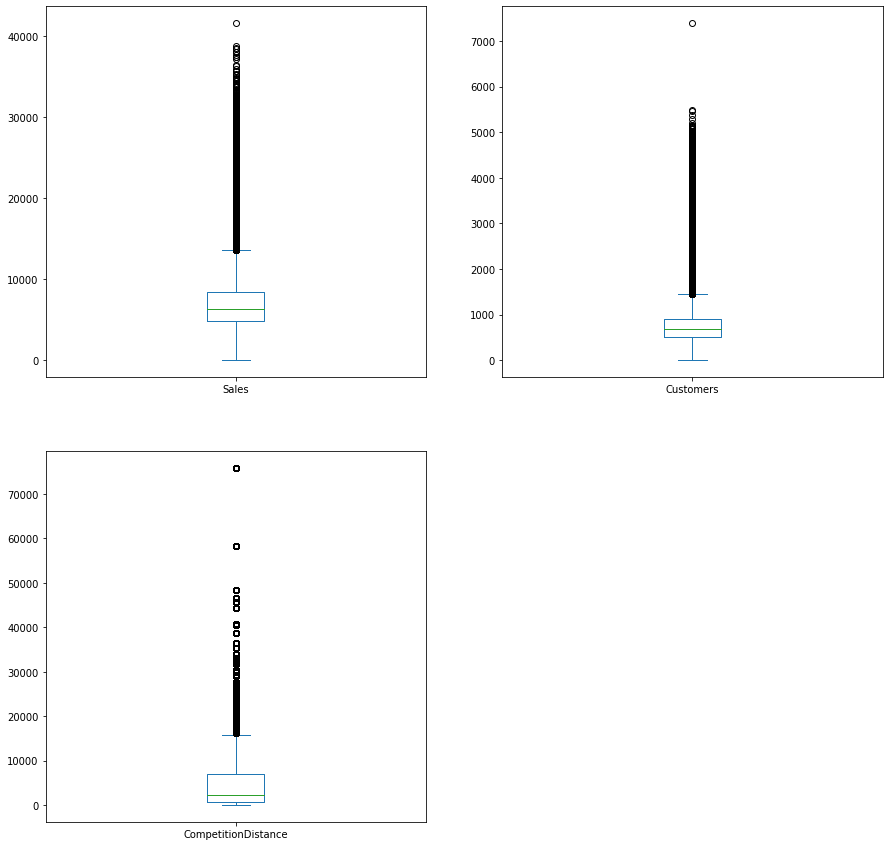

In [ ]:
sales.plot(y=['Sales', 'Customers', 'CompetitionDistance'], 
           kind='box', subplots=True, layout=(2,2), figsize=(15,15))

From the box plots above we can see that Sales, Customers, and CompetitionDistance all appear to have significant outliers, so we'll explore further by calculating and investigating the outliers for each one.


# **Sales Outliers**



We will start with the Sales column.

In [ ]:
def calculate_outlier(df,column): ## function for calculating outliers
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    IQR = Q3 - Q1
    print(IQR)
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    percent_outliers = round(((df[df[column] > upper].shape[0]) + (df[df[column] < lower].shape[0])) / df.shape[0] * 100, 2)
    return lower, upper, percent_outliers

In [ ]:
col = 'Sales'
lower_sales, upper_sales, percent_outliers_sales = calculate_outlier(sales, col)

print("lower band = " + str(lower_sales))
print("upper band = " + str(upper_sales))
print("percentage of sales that are outliers = " + str(percent_outliers_sales) + "%")
print('Number of observations in which sales leass than <0 are '+str(len(sales[sales.Sales <0])))

3501.0
lower band = -392.5
upper band = 13611.5
percentage of sales that are outliers = 3.64%
Number of observations in which sales leass than <0 are 0


We know from our summary statistics that there aren't any sales below 0, so we'll just look at the upper outliers that we've calculated for the Sales column.

In [ ]:
sales[sales[col] > upper_sales]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,DayOfMonth
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9,2009,0,<NA>,<NA>,NaN,2015,7,31
6,7,5,2015-07-31,15344,1414,1,0,1,a,c,24000.0,4,2013,0,<NA>,<NA>,NaN,2015,7,31
23,24,5,2015-07-31,14190,1082,1,0,1,a,c,4590.0,3,2000,1,40,2011,"Jan,Apr,Jul,Oct",2015,7,31
24,25,5,2015-07-31,14180,1586,1,0,1,c,a,430.0,4,2003,0,<NA>,<NA>,NaN,2015,7,31
83,84,5,2015-07-31,14949,1439,1,0,1,a,c,11810.0,8,2014,0,<NA>,<NA>,NaN,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015796,817,3,2013-01-02,25357,3462,0,0,1,a,a,140.0,3,2006,0,<NA>,<NA>,NaN,2013,1,2
1015821,842,3,2013-01-02,20355,1257,0,0,1,d,c,1200.0,11,2007,0,<NA>,<NA>,NaN,2013,1,2
1016012,1033,3,2013-01-02,13811,1408,0,0,1,a,a,7680.0,3,2006,0,<NA>,<NA>,NaN,2013,1,2
1016093,1114,3,2013-01-02,20642,3401,0,0,1,a,c,870.0,<NA>,<NA>,0,<NA>,<NA>,NaN,2013,1,2


While 30,769 is a lot of values, we can see from our calculte_outlier function that these outliers only account for 3.64% of all our sales values.

We'll look further to see if we see any trends with the outliers based on Month or Type of Store.

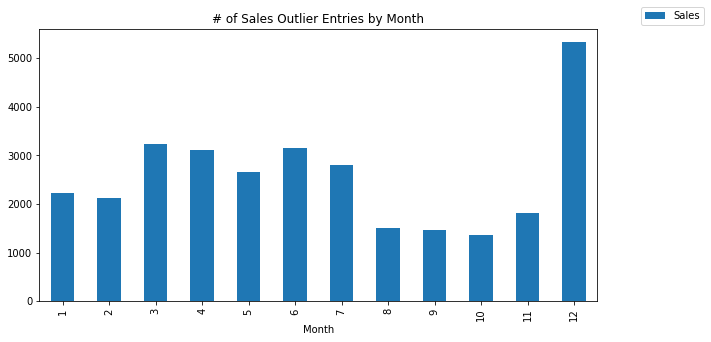

In [ ]:
sales_outliers_by_month = pd.pivot_table((sales.loc[sales[col] > upper_sales]), index='Month', values='Sales', aggfunc='count')

sales_outliers_by_month.plot(y='Sales', kind='bar', figsize=(10,5), title="# of Sales Outlier Entries by Month")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

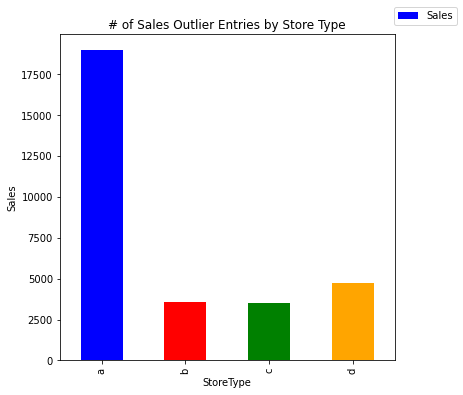

In [ ]:
sales_outliers_by_stype = pd.pivot_table((sales.loc[sales[col] > upper_sales]), index='StoreType', values='Sales', aggfunc='count')

sales_outliers_by_stype.plot(y='Sales', kind='bar', figsize=(6,6), 
                             title="# of Sales Outlier Entries by Store Type", 
                             color=['blue','red','green','orange'])
plt.ylabel('Sales')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

When we look at the Sales outliers by month, we see the most represented month is **December at 17.33%**, which is unsurprising given the Christmas holidays. However, when we look at the outliers by Store Type we see that the **61.71% majority** are coming from **Type A stores**, while **Type B, C, D** are more equally represented at **11-15%**. This suggests that Type A stores may be the best performers in regards to outstanding sales days, and is worth looking into further.

Below we will treat our Sales outliers by imputing them with our upper range value we calculated earlier, **13611.5**, rounded up to **13612** as our Sales column is a measure of discrete values using whole numbers. As these outliers represent exceptionally high sales day, they are intended to be high numbers, but we would like to treat the outliers to limit their influence on any future modelling. As such imputing with our upper range value feels more appropriate than using our mean Sales value.

We also save this a new dataframe going forward, to further be referenced to as sales_treated, so that we can preserve our sales dataframe with the outliers intact, should we wish to investigate them further.

In [ ]:
sales_treated = sales.copy()

In [ ]:
sales_treated.loc[sales_treated[col] > upper_sales, 'Sales'] = 13612

Further check whether our imputation worked or not

In [ ]:
sales_treated[sales_treated['Sales'] > 13612]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,DayOfMonth


# **Customer Outliers**

Next we'll calculate and investigate our Customer outliers.

In [ ]:
col = 'Customers'
lower_cust, upper_cust, percent_outliers_cust = calculate_outlier(sales_treated, col)

print(str(lower_cust) + ", " + str(upper_cust) +", " + str(percent_outliers_cust) + "%")
print('Number of rows when customer < 0 : ' + str(len(sales[sales_treated['Customers']<0])))

374.0
-42.0, 1454.0, 4.84%
Number of rows when customer < 0 : 0


Similar to Sales, we know from our summary statistics that we don't have any Customer values below 0, so we'll just look at our upper range value.

In [ ]:
sales_treated[sales_treated['Customers'] > upper_cust]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,DayOfMonth
3,4,5,2015-07-31,13612,1498,1,0,1,c,c,620.0,9,2009,0,<NA>,<NA>,NaN,2015,7,31
24,25,5,2015-07-31,13612,1586,1,0,1,c,a,430.0,4,2003,0,<NA>,<NA>,NaN,2015,7,31
124,125,5,2015-07-31,13612,2041,1,0,1,a,a,760.0,12,2005,0,<NA>,<NA>,NaN,2015,7,31
210,211,5,2015-07-31,13612,1659,1,0,1,a,c,350.0,11,2006,0,<NA>,<NA>,NaN,2015,7,31
250,251,5,2015-07-31,13612,2508,1,0,1,a,c,340.0,<NA>,<NA>,0,<NA>,<NA>,NaN,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016093,1114,3,2013-01-02,13612,3401,0,0,1,a,c,870.0,<NA>,<NA>,0,<NA>,<NA>,NaN,2013,1,2
1016356,262,2,2013-01-01,13612,2875,0,a,1,b,a,1180.0,5,2013,0,<NA>,<NA>,NaN,2013,1,1
1016517,423,2,2013-01-01,9643,1751,0,a,1,b,a,1270.0,5,2014,0,<NA>,<NA>,NaN,2013,1,1
1016656,562,2,2013-01-01,8498,1675,0,a,1,b,c,1210.0,<NA>,<NA>,0,<NA>,<NA>,NaN,2013,1,1


We Can see right away that several of these entries have a **Sales value of 13,612**, which we know to be our newly imputed upper range value for Sales outliers. We expect a high correlation between Customers driving Sales, so we'll check to see how much crossover we have between our Sales and Customers outliers.\

In [ ]:
sales_treated[(sales_treated['Customers'] > upper_cust) & (sales_treated['Sales'] == 13612)]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,DayOfMonth
3,4,5,2015-07-31,13612,1498,1,0,1,c,c,620.0,9,2009,0,<NA>,<NA>,NaN,2015,7,31
24,25,5,2015-07-31,13612,1586,1,0,1,c,a,430.0,4,2003,0,<NA>,<NA>,NaN,2015,7,31
124,125,5,2015-07-31,13612,2041,1,0,1,a,a,760.0,12,2005,0,<NA>,<NA>,NaN,2015,7,31
210,211,5,2015-07-31,13612,1659,1,0,1,a,c,350.0,11,2006,0,<NA>,<NA>,NaN,2015,7,31
250,251,5,2015-07-31,13612,2508,1,0,1,a,c,340.0,<NA>,<NA>,0,<NA>,<NA>,NaN,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015735,756,3,2013-01-02,13612,2465,0,0,1,a,c,50.0,<NA>,<NA>,1,40,2011,"Jan,Apr,Jul,Oct",2013,1,2
1015767,788,3,2013-01-02,13612,1791,0,0,1,a,c,1530.0,3,2013,0,<NA>,<NA>,NaN,2013,1,2
1015796,817,3,2013-01-02,13612,3462,0,0,1,a,a,140.0,3,2006,0,<NA>,<NA>,NaN,2013,1,2
1016093,1114,3,2013-01-02,13612,3401,0,0,1,a,c,870.0,<NA>,<NA>,0,<NA>,<NA>,NaN,2013,1,2


We can see a crossover of **21,420 rows**, or approximately **52%** of our Customer outlier entries are also Sales outlier entries.

We will also investigate how these Customer outliers break down by Month and StoreType just as we did with our Sales outliers.

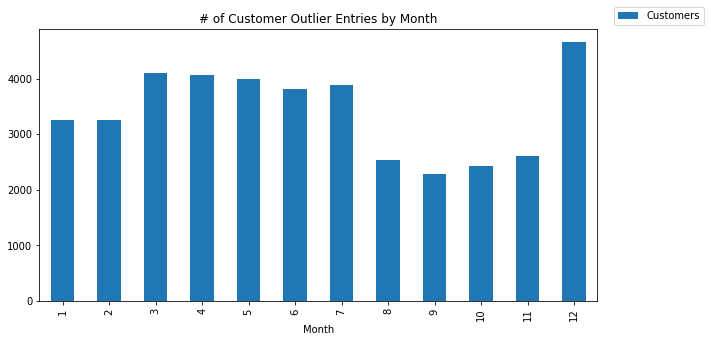

In [ ]:
cust_outliers_by_month = pd.pivot_table((sales_treated.loc[sales_treated[col] > upper_cust]), index='Month', values='Customers', aggfunc='count')

cust_outliers_by_month.plot(y='Customers', kind='bar', figsize=(10,5), title="# of Customer Outlier Entries by Month")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

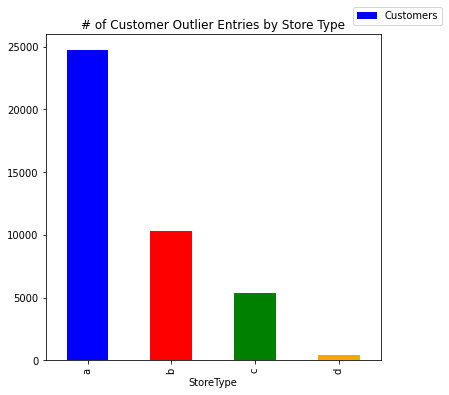

In [ ]:
cust_outliers_by_stype = pd.pivot_table((sales_treated.loc[sales_treated[col] > upper_cust]), index='StoreType', values='Customers', aggfunc='count')

cust_outliers_by_stype.plot(y='Customers', kind='bar', figsize=(6,6), 
                             title="# of Customer Outlier Entries by Store Type", 
                             color=['blue','red','green','orange'])
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

**December** is our most represented month for Customer outliers, similar to our Sales outliers, but it's percentage of outliers is less than we saw with our Sales.

We also see **store Type A** with the strongest showing when we break down the outliers by store type. Much like the Sales outliers **Type A stores** represent a **strong 60%+** of the outliers. Surprisingly, **Type D stores** represent a tiny **1.02%** of these Customer outliers, where as they represented the second largest percentage of Sales outliers at **15.29%**. Further investigation into the number of items bought (Sales) per transaction (Customer) may prove insightful.

Similar to our Sales outliers, we will also limit our Customer outliers to our calculated upper range, by imputing them to **1,454,** so as to limit their influence but also indicate that they're meant to be high numbers.

In [ ]:
sales_treated.loc[sales_treated['Customers'] > upper_cust, 'Customers'] = 1454

In [ ]:
sales_treated.loc[sales_treated['Customers'] > upper_cust, 'Customers']


Series([], Name: Customers, dtype: int64)

# **Competition Distance Outliers**

Next we'll calculate and investigate our Competition Distance outliers.

In [ ]:
col = 'CompetitionDistance'
lower_cust, upper_cust, percent_outliers_cust = calculate_outlier(sales_treated, col)

print("Lower band" + str(lower_cust) + ",  Upper Band :" + str(upper_cust) +", Percentage Outliers:" + str(percent_outliers_cust) + "%")
print('Number of rows when Competition distance < 0 : ' + str(len(sales[sales_treated[col]<0])))

6180.0
Lower band-8560.0,  Upper Band :16160.0, Percentage Outliers:9.83%
Number of rows when Competition distance < 0 : 0


Similar to Sales and Customers, we know from our summary statistics that we don't have any Competition distance  values below 0 and it shouldn't be because distance is never a negative quantity, so we'll just look at our upper range value.

In [ ]:
sales_treated[sales_treated['CompetitionDistance'] > upper_cust]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,DayOfMonth
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4,2015,0,<NA>,<NA>,NaN,2015,7,31
6,7,5,2015-07-31,13612,1414,1,0,1,a,c,24000.0,4,2013,0,<NA>,<NA>,NaN,2015,7,31
48,49,5,2015-07-31,10310,666,1,0,1,d,c,18010.0,9,2007,0,<NA>,<NA>,NaN,2015,7,31
52,53,5,2015-07-31,7540,690,1,0,1,a,c,30360.0,9,2013,0,<NA>,<NA>,NaN,2015,7,31
63,64,5,2015-07-31,13251,935,1,0,1,d,c,22560.0,<NA>,<NA>,1,14,2013,"Jan,Apr,Jul,Oct",2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016024,1045,3,2013-01-02,8282,975,0,0,1,a,c,26990.0,12,2013,0,<NA>,<NA>,NaN,2013,1,2
1016025,1046,3,2013-01-02,6832,614,0,0,1,d,c,29070.0,4,2005,0,<NA>,<NA>,NaN,2013,1,2
1016048,1069,3,2013-01-02,5685,850,0,0,1,a,c,18050.0,<NA>,<NA>,1,14,2011,"Jan,Apr,Jul,Oct",2013,1,2
1016058,1079,3,2013-01-02,7566,669,0,0,1,a,a,16680.0,<NA>,<NA>,1,37,2009,"Jan,Apr,Jul,Oct",2013,1,2


We will also investigate how these Competition outliers break down by Month and StoreType just as we did with our Sales outliers.

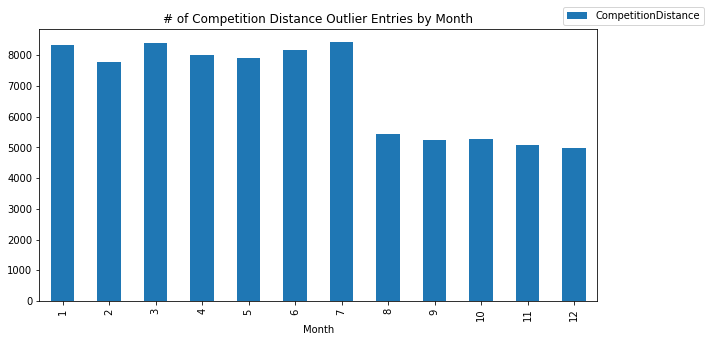

In [ ]:
comp_dist_outliers_by_month = pd.pivot_table((sales_treated.loc[sales_treated[col] > upper_cust]), index='Month', values='CompetitionDistance', aggfunc='count')

comp_dist_outliers_by_month.plot(y='CompetitionDistance', kind='bar', figsize=(10,5), title="# of Competition Distance Outlier Entries by Month")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

From the given plot we can observe that in the month of **January** to **July** the competition distance has high outliers so it seems that in these month the competitors with the rossmann store will be less..And it could lead to high sales compared to the month of **August** to **December**.

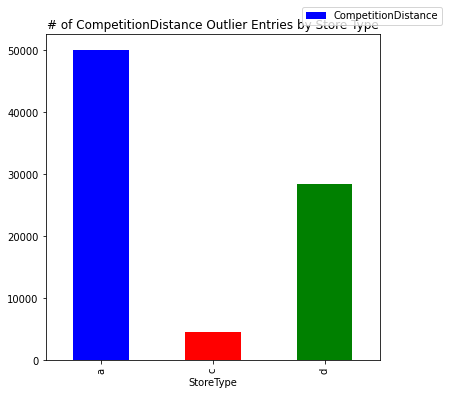

In [ ]:
comp_dist_outliers_by_stype = pd.pivot_table((sales_treated.loc[sales_treated[col] > upper_cust]), index='StoreType', values='CompetitionDistance', aggfunc='count')

comp_dist_outliers_by_stype.plot(y='CompetitionDistance', kind='bar', figsize=(6,6), 
                             title="# of CompetitionDistance Outlier Entries by Store Type", 
                             color=['blue','red','green','orange'])
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

We can clearly observe that **Store type B** has **zero** competition distance outliers. 
**StoreType A** has the strongest Competition distance outliers with **59%+** of the outliers. But this is not surprising as the number of **StoreType A** are highest in numbers. And contibuting **54.13%** to the dataset. **Storetype C** has less i.e. **5%** outliers. **StoreTypeD **has total **25,8774** stores and having **34.53%** outliers.


Similar to our Sales outliers, we will also limit our Competition Distance outliers to our calculated upper range, by imputing them to **16185,** so as to limit their influence but also indicate that they're meant to be high numbers.

In [ ]:
sales_treated.loc[sales_treated['CompetitionDistance'] > upper_cust, 'CompetitionDistance'] = 16185

In [ ]:
sales_treated.loc[sales_treated['Customers'] > upper_cust, 'Customers']

Series([], Name: Customers, dtype: int64)

# **Missing Values**

Next we'll take a look at missing values. We'll start by assessing how many we have and where.

In [ ]:
sales_treated.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2186
CompetitionOpenSinceMonth    268619
CompetitionOpenSinceYear     268619
Promo2                            0
Promo2SinceWeek              423307
Promo2SinceYear              423307
PromoInterval                423307
Year                              0
Month                             0
DayOfMonth                        0
dtype: int64

In [ ]:
(sales_treated.isna().sum() * 100 / sales_treated.shape[0]).round(2)   ## missing values as a % of all values in the column

Store                         0.00
DayOfWeek                     0.00
Date                          0.00
Sales                         0.00
Customers                     0.00
Promo                         0.00
StateHoliday                  0.00
SchoolHoliday                 0.00
StoreType                     0.00
Assortment                    0.00
CompetitionDistance           0.26
CompetitionOpenSinceMonth    31.81
CompetitionOpenSinceYear     31.81
Promo2                        0.00
Promo2SinceWeek              50.13
Promo2SinceYear              50.13
PromoInterval                50.13
Year                          0.00
Month                         0.00
DayOfMonth                    0.00
dtype: float64

While we see a rather high 50% missing values rate for Promo2SinceWeek and Promo2SinceYear we can check and see if these all just correspond to stores that aren't running Promo2, and hence would not be expected to have valid data for these columns.

In [ ]:
print(sales_treated[sales_treated['Promo2'] == 0].shape[0])
print(sales_treated['Promo2SinceWeek'].isna().sum())
print(sales_treated['Promo2SinceYear'].isna().sum())

423307
423307
423307


As the number of entries with missing **Promo2SinceWeek** and **Promo2SinceYear** values corresponds with the number of entries where the store isn't participating in Promo2, we can rest assured that the lack of data here is appropriate.



The other area we see missing data is in relation to competition stores, mostly in the two columns relating when the nearest competitor store opened, and to much lesser extent in **CompetitionDistance**

The CompetitionDistance values may be used for analyzing how stores perform based on how close their competition is, and as such missing values could skew such analysis. 0 would be an inappropriate replacement for these null values as it would indicate that the competition stores are incredibly close. As such we'll look to replace these missing values with the mean CompetitionDistance based on the StoreType.

In [ ]:
mean_type_a = round(store_lookup.loc[(store_lookup['StoreType'] == 'a'), 'CompetitionDistance'].mean(), 1)
mean_type_b = round(store_lookup.loc[(store_lookup['StoreType'] == 'b'), 'CompetitionDistance'].mean(), 1)
mean_type_c = round(store_lookup.loc[(store_lookup['StoreType'] == 'c'), 'CompetitionDistance'].mean(), 1)
mean_type_d = round(store_lookup.loc[(store_lookup['StoreType'] == 'd'), 'CompetitionDistance'].mean(), 1)

print("The mean Compeition Distance for stores of type A is " + str(mean_type_a))
print("The mean Compeition Distance for stores of type B is " + str(mean_type_b))
print("The mean Compeition Distance for stores of type C is " + str(mean_type_c))
print("The mean Compeition Distance for stores of type D is " + str(mean_type_d))

The mean Compeition Distance for stores of type A is 5123.1
The mean Compeition Distance for stores of type B is 1060.6
The mean Compeition Distance for stores of type C is 3522.6
The mean Compeition Distance for stores of type D is 6913.1


In [ ]:
sales_treated.loc[sales_treated['StoreType'] == 'a'] = sales_treated.loc[sales_treated['StoreType'] == 'a'].fillna(value={"CompetitionDistance" : mean_type_a})
sales_treated.loc[sales_treated['StoreType'] == 'b'] = sales_treated.loc[sales_treated['StoreType'] == 'b'].fillna(value={"CompetitionDistance" : mean_type_b}) 
sales_treated.loc[sales_treated['StoreType'] == 'c'] = sales_treated.loc[sales_treated['StoreType'] == 'c'].fillna(value={"CompetitionDistance" : mean_type_c}) 
sales_treated.loc[sales_treated['StoreType'] == 'd'] = sales_treated.loc[sales_treated['StoreType'] == 'd'].fillna(value={"CompetitionDistance" : mean_type_d}) 

In [ ]:
sales_treated.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    268619
CompetitionOpenSinceYear     268619
Promo2                            0
Promo2SinceWeek              423307
Promo2SinceYear              423307
PromoInterval                423307
Year                              0
Month                             0
DayOfMonth                        0
dtype: int64

Next we will replace the null values in our PromoInterval column. As this column contains strings listing the months the Promo2 starts anew, we will replace the missing values with a string 'NA' for Not Applicable.

In [ ]:
sales_treated.loc[sales_treated['PromoInterval'].isna(), 'PromoInterval'] = "NA"

In [ ]:
sales_treated['PromoInterval'].value_counts()

NA                  423307
Jan,Apr,Jul,Oct     242411
Feb,May,Aug,Nov      98005
Mar,Jun,Sept,Dec     80669
Name: PromoInterval, dtype: int64

For the missing values in **'CompetitionOpenSinceYear'** & **'Promo2SinceYear'** it would be inappropriate to replace them with zeros, as further calculations with the years in that column could lead to values suggesting a competition store has been open **2022** years. As such, we'll impute these missing values with the current year, so if calculations are done to find how long the nearest competition store has been open since these instances of no competition store nearby will return zero years.

In the same manner we will impute the missing values in **'CompetitionOpenSinceMonth'** with the **current month**, and 'Promo2SinceWeek' with the current week.

In [ ]:
sales_treated.loc[sales_treated['CompetitionOpenSinceYear'].isna(), 'CompetitionOpenSinceYear'] = dt.datetime.now().year

sales_treated.loc[sales_treated['Promo2SinceYear'].isna(), 'Promo2SinceYear'] = dt.datetime.now().year

sales_treated.loc[sales_treated['CompetitionOpenSinceMonth'].isna(), 'CompetitionOpenSinceMonth'] = dt.datetime.now().month

sales_treated.loc[sales_treated['Promo2SinceWeek'].isna(), 'Promo2SinceWeek'] = dt.datetime.now().isocalendar()[1]

In [ ]:
# lets see the null counts
sales_treated.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
DayOfMonth                   0
dtype: int64

# **Question 5: Establising relationship between Sales and Customers ?**

 **Adding an UPT column**

Based on our investigation of Sales and Costumers outliers, particularly how they're represented by different store types, I thought it would be worthwhile to add a calculated column to give us some insight into the relationship between Customers and Sales for each store and day.

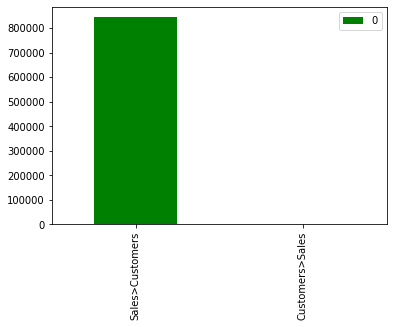

In [ ]:
df=pd.DataFrame((sales_treated['Customers'] >= sales_treated['Sales']).value_counts()).rename(index={False: 'Sales>Customers',True:'Customers>Sales'})
df.plot(kind='bar',color=['green','red'])

We can see that for almost all entries we have in our dataframe, the number of Sales at a given store is greater than the number of Customers. Suggesting that the Customers value is derived by how many transactions there are at a store, and the Sales value is indicative of how many individual items are sold. Thus we can calculate the average number of items sold for each transaction as Units Per Transaction (UPT).

First we'll quickly investigate the 54 rows where there aren't more Sales than Customers.

In [ ]:
sales_treated[sales_treated['Customers'] >= sales_treated['Sales']]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,DayOfMonth
86825,971,5,2015-05-15,0,0,0,0,1,c,a,1140.0,5,2011,1,14,2012,"Mar,Jun,Sept,Dec",2015,5,15
142278,674,4,2015-03-26,0,0,0,0,0,a,a,2640.0,12,2005,1,31,2013,"Feb,May,Aug,Nov",2015,3,26
196938,699,4,2015-02-05,0,0,1,0,0,a,a,180.0,1,2023,1,5,2013,"Jan,Apr,Jul,Oct",2015,2,5
322053,708,3,2014-10-01,0,0,1,0,0,c,c,11470.0,10,2009,1,18,2014,"Jan,Apr,Jul,Oct",2014,10,1
330176,357,1,2014-09-22,0,0,0,0,0,a,a,2060.0,10,2008,0,4,2023,NA,2014,9,22
340348,227,4,2014-09-11,0,0,0,0,0,a,a,2370.0,1,2023,0,4,2023,NA,2014,9,11
340860,835,4,2014-09-11,0,0,0,0,0,a,a,2890.0,12,2007,1,10,2014,"Mar,Jun,Sept,Dec",2014,9,11
341795,835,3,2014-09-10,0,0,0,0,0,a,a,2890.0,12,2007,1,10,2014,"Mar,Jun,Sept,Dec",2014,9,10
346232,548,5,2014-09-05,0,0,1,0,1,d,c,3760.0,2,2009,0,4,2023,NA,2014,9,5
346734,28,4,2014-09-04,0,0,1,0,0,a,a,1200.0,10,2014,1,6,2015,"Mar,Jun,Sept,Dec",2014,9,4


We can see the majority of these days are entries with both zero Sales and zero Customers recorded. This seems odd for a day that the store is open. A quick check of merged_sales, which still has the Open column, gives us the same results and assures us that the stores are indeed marked as open on these days.

In [ ]:
merged_sales[(merged_sales['Customers'] >= merged_sales['Sales']) & merged_sales['Open'] == 1]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,DayOfMonth
86825,971,5,2015-05-15,0,0,1,0,0,1,c,...,1140.0,5,2011,1,14,2012,"Mar,Jun,Sept,Dec",2015,5,15
142278,674,4,2015-03-26,0,0,1,0,0,0,a,...,2640.0,12,2005,1,31,2013,"Feb,May,Aug,Nov",2015,3,26
196938,699,4,2015-02-05,0,0,1,1,0,0,a,...,180.0,<NA>,<NA>,1,5,2013,"Jan,Apr,Jul,Oct",2015,2,5
322053,708,3,2014-10-01,0,0,1,1,0,0,c,...,11470.0,10,2009,1,18,2014,"Jan,Apr,Jul,Oct",2014,10,1
330176,357,1,2014-09-22,0,0,1,0,0,0,a,...,2060.0,10,2008,0,<NA>,<NA>,NaN,2014,9,22
340348,227,4,2014-09-11,0,0,1,0,0,0,a,...,2370.0,<NA>,<NA>,0,<NA>,<NA>,NaN,2014,9,11
340860,835,4,2014-09-11,0,0,1,0,0,0,a,...,2890.0,12,2007,1,10,2014,"Mar,Jun,Sept,Dec",2014,9,11
341795,835,3,2014-09-10,0,0,1,0,0,0,a,...,2890.0,12,2007,1,10,2014,"Mar,Jun,Sept,Dec",2014,9,10
346232,548,5,2014-09-05,0,0,1,1,0,1,d,...,3760.0,2,2009,0,<NA>,<NA>,NaN,2014,9,5
346734,28,4,2014-09-04,0,0,1,1,0,0,a,...,1200.0,10,2014,1,6,2015,"Mar,Jun,Sept,Dec",2014,9,4


I can only speculate as to why we have entries for stores that are open but aren't recording any sales, perhaps a stocktake day? Let's also look at the cases that aren't zero Sales and zero Customers.

In [ ]:
sales_treated[sales_treated['Customers'] > sales_treated['Sales']]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,DayOfMonth
478649,1100,2,2014-04-29,0,3,1,0,0,a,a,540.0,1,2023,1,14,2011,"Jan,Apr,Jul,Oct",2014,4,29
889932,948,4,2013-04-25,0,5,1,0,0,b,b,1430.0,1,2023,0,4,2023,NA,2013,4,25


I'm unsure of why we have two days with zero Sales and a small handful of Customers. As I have no explanation for these 2 days, nor the 52 other open days with zero Sales and Customers, I don't feel comfortable deleting them.

This does pose a small problem for calculating our average UPT, however. As such we will create our UPT column by dividing the day's Sales by the days Customers to find the average Units Per Transaction for each day and store. The resulting 52 null values will be imputed with a zero to reflect the zero Sales for those entries.

In [ ]:
sales_treated['UPT'] = sales_treated['Sales'] / sales_treated['Customers']

In [ ]:
sales_treated['UPT'].isna().sum()

52

In [ ]:
sales_treated.loc[sales_treated['UPT'].isna(), 'UPT'] = 0

In [ ]:
sales_treated['UPT'].isna().sum()

0

We'll also add this UPT column to our sales table which still contains our Sales and Customers outliers, so we can explore the UPT with the outliers as well.

In [ ]:
sales['UPT'] = sales['Sales'] / sales['Customers']
sales.loc[sales['UPT'].isna(), 'UPT'] = 0

# **Review of Summary Statistics Post Cleaning**

Let's quickly review some of our summary statistics now that we've cleaned our data a bit. We can look at the summary statistics for sales to see them as they were before treating outliers and imputing for missing data, and compare them to the sales_treated summary statistics to see how they've changed.

In [ ]:
merged_sales[['Sales', 'Customers', 'CompetitionDistance']].describe() ## BEFORE cleaning


,Sales,Customers,CompetitionDistance
count,1.017209e+06,1.017209e+06,1.014567e+06
mean,5.773819e+03,6.331459e+02,5.430086e+03
std,3.849926e+03,4.644117e+02,7.715324e+03
min,0.000000e+00,0.000000e+00,2.000000e+01
25%,3.727000e+03,4.050000e+02,7.100000e+02
50%,5.744000e+03,6.090000e+02,2.330000e+03
75%,7.856000e+03,8.370000e+02,6.890000e+03
max,4.155100e+04,7.388000e+03,7.586000e+04


In [ ]:
sales_treated[['Sales', 'Customers', 'CompetitionDistance', 'UPT']].describe() ## AFTER cleaning

,Sales,Customers,CompetitionDistance,UPT
count,844392.000000,844392.000000,844392.000000,844392.000000
mean,6840.659923,734.787972,4666.758202,9.535935
std,2717.364981,296.171183,5213.908641,2.103304
min,0.000000,0.000000,20.000000,0.000000
25%,4859.000000,519.000000,710.000000,7.996429
50%,6369.000000,676.000000,2330.000000,9.361761
75%,8360.000000,893.000000,6900.000000,10.864260
max,13612.000000,1454.000000,16185.000000,52.153257


We can see that the cleaning has narrowed our standard deviation for Sales and Customers, as well as raising the mean after removing the entries for closed stores.

In [ ]:
merged_sales[['Sales', 'Customers', 'CompetitionDistance']].skew() ## BEFORE cleaning

Sales                  0.641460
Customers              1.598650
CompetitionDistance    2.928534
dtype: float64

In [ ]:
sales_treated[['Sales', 'Customers', 'CompetitionDistance', 'UPT']].skew() ## AFTER cleaning

Sales                  0.717438
Customers              0.803485
CompetitionDistance    1.210589
UPT                    0.560278
dtype: float64

In [ ]:
merged_sales[['Sales', 'Customers', 'CompetitionDistance']].kurtosis() ## BEFORE cleaning

Sales                   1.778375
Customers               7.091773
CompetitionDistance    13.000022
dtype: float64

In [ ]:
sales_treated[['Sales', 'Customers', 'CompetitionDistance', 'UPT']].kurtosis() ## AFTER cleaning

Sales                  0.057682
Customers              0.102116
CompetitionDistance    0.115246
UPT                    1.124173
dtype: float64

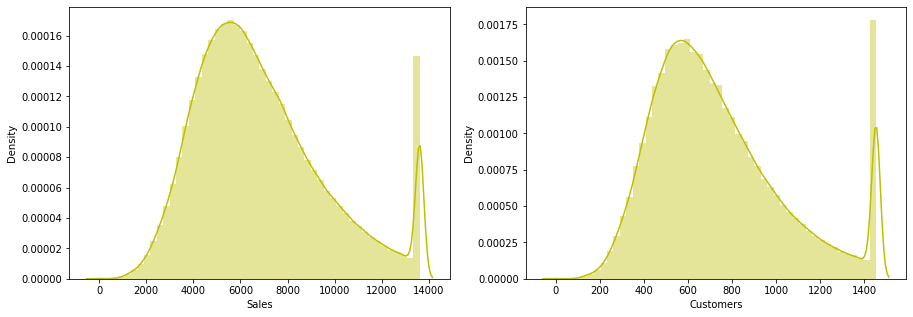

In [ ]:
fig,axes = plt.subplots(1,2)
sns.distplot(sales_treated['Sales'],color="y",ax=axes[0])
sns.distplot(sales_treated['Customers'],color="y",ax=axes[1])
fig.set_size_inches(15,5)

Histograms of our Sales and Customers values shows us a slight positive skew, which changed a little after our cleaning, and we see a more significant change in kurtosis being lowered. We also see the effect of imputing our outliers with our upper range limit on the right side of either histogram.

 we now got results that are looking far closer to a standard normalization.

## **Exploratory Insights**

## **Question 6: How stores perform in Sales by month based of Assortment type?**

Let's explore how stores perform in Sales by month, based on Assortment type. We know that Assortment type A offers a "basic" assortment of merchandise, Type B offers and "extra" assortment, and type C offers an "extended" assortment.

Because our data ranges from Jan. 1, 2013 - July 31, 2015, we will exclude the 2015 data for now so as we are only looking at a complete years' worth of numbers.

In [ ]:
assortment_pivot_total_sales = pd.pivot_table((sales_treated[sales_treated['Year'] < 2015]), ## Excluding 2015 data
               index='Month', values='Sales', columns='Assortment', aggfunc=np.sum)
assortment_pivot_total_sales

Assortment,a,b,c
Month,,,
1,188100262,3754636,171893846
2,178031925,3710558,164191126
3,198172555,4173361,185276735
4,191177863,4233401,176759688
5,191082283,4691504,178547553
6,185757989,4503724,174429599
7,188440724,4338877,184388970
8,175000464,4111225,178291640
9,168298236,4127263,165868274


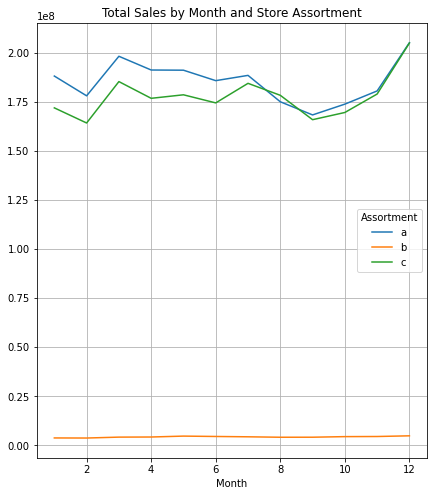

In [ ]:
assortment_pivot_total_sales.plot(kind='line', title='Total Sales by Month and Store Assortment', figsize=(7,8), grid=True)
plt.show()

A quick look at Sales by volume of total sales shows that stores of Assortment types A and C have significantly more volume than type B stores. Type B stores stay fairly consistent in total Sales volume across all months, with minor upticks during mid-year and end year. Type A and C stores can be seen to follow very similar trends in terms of Sales volume.

A quick look at how many stores we have of each Assortment type will show us significantly less stores of Assortment type B, which accounts for the significantly lower volume of Sales.

In [ ]:
pd.pivot_table((sales_treated[sales_treated['Year'] < 2015]), index='Assortment', values='Store', aggfunc='count')

,Store
Assortment,
a,340968
b,6304
c,301088


Due to the vast differences in total Sales volume based on Assortment type, lets also look at the average number of Sales.

(Note: We could include our 2015 data since we're calculating the mean Sales now, but for the sake of consistency when comparing it with the total Sales we will continue to use the same 2013-2014 data.)

In [ ]:
assortment_pivot_avg_sales = pd.pivot_table((sales_treated[sales_treated['Year'] < 2015]), index='Month', values='Sales', columns='Assortment', aggfunc=np.mean)
assortment_pivot_avg_sales

Assortment,a,b,c
Month,,,
1,6136.639110,6940.177449,6514.338348
2,6256.393204,7603.602459,6692.936817
3,6559.181644,7979.657744,7081.361222
4,6569.460259,8048.290875,7021.796687
5,6654.673086,8407.713262,7155.927738
6,6484.604796,8340.229630,6986.406016
7,6539.447668,8233.163188,7076.641465
8,6180.267834,7801.185958,6972.688307
9,6176.988769,8092.672549,6749.746643


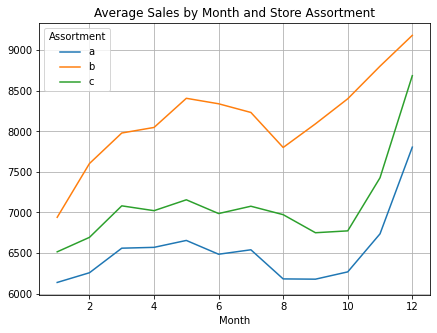

In [ ]:
assortment_pivot_avg_sales.plot(kind='line', title='Average Sales by Month and Store Assortment', figsize=(7,5), grid=True)
plt.show()

Look at average Sales by store Assortment type we can see that stores of type B actually perform quite well when compared to types A and C, despite there being significantly less type B stores! Types A and C continue to follow very similar trends for Sales, but Type C stores consistently outperform type A stores.



## **Question 7: How UPT metric compares across stores of different assortment types ?**

Let's also take a look at how our UPT metric compares across stores of different Assortment types.

(Note: Because we included a UPT metric for our table that still has our extremely high Sales outliers, we will plot that too, to compare.)

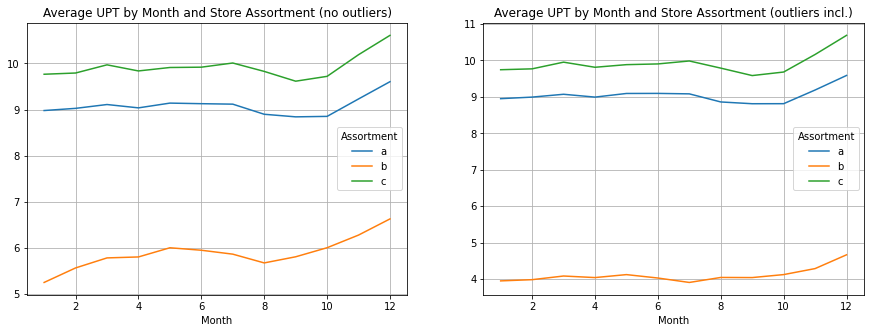

In [ ]:
assortment_pivot_avg_UPT = pd.pivot_table((sales_treated[sales_treated['Year'] < 2015]), 
                                     index='Month', values='UPT', columns='Assortment', aggfunc=np.mean)
assortment_pivot_avg_UPT_outliers = pd.pivot_table((sales[sales['Year'] < 2015]), 
                                     index='Month', values='UPT', columns='Assortment', aggfunc=np.mean)

fig, axes = plt.subplots(nrows=1, ncols=2)

assortment_pivot_avg_UPT.plot(kind='line', title='Average UPT by Month and Store Assortment (no outliers)', figsize=(7,5), grid=True, ax=axes[0])
assortment_pivot_avg_UPT_outliers.plot(kind='line', title='Average UPT by Month and Store Assortment (outliers incl.)', figsize=(7,5), grid=True, ax=axes[1])
fig.set_size_inches(15, 5)
plt.show()

We can see stores of Assortment type C are our best performers for UPT. Comparing UPT with and without outliers treated, we can see that with the outliers treated we can more clearly see upward and downward trends, whereas with outliers included these trends look less impactful.

Exploring out Sales and Customers outliers prompted us to create out UPT metric when comparing them by StoreType, so let's explore Sales and UPT by month and StoreType as well.

Let's start with a look at how many stores of each StoreType we have.

In [ ]:
pd.pivot_table((sales_treated[sales_treated['Year'] < 2015]), index='StoreType', values='Store', aggfunc='count')

,Store
StoreType,
a,351476
b,11959
c,87079
d,197846


Next let's look at average Sales per month, broken down by StoreType.

In [ ]:
stype_pivot_avg_sales = pd.pivot_table((sales_treated[sales_treated['Year'] < 2015]), ## Excluding 2015 data
               index='Month', values='Sales', columns='StoreType', aggfunc=np.mean)
stype_pivot_avg_sales

StoreType,a,b,c,d
Month,,,,
1,6340.939457,8336.488072,6325.695836,6159.515050
2,6481.948327,8839.864537,6476.370302,6314.299544
3,6781.173209,9106.575911,6847.562350,6723.579013
4,6794.130360,9133.661885,6779.331581,6657.805468
5,6840.385002,9350.734115,6917.847151,6857.707885
6,6695.761585,9321.768687,6667.874042,6677.662636
7,6810.202874,9081.286555,6711.115334,6709.382984
8,6533.024121,8773.740958,6575.015995,6491.047891
9,6451.144734,8957.519192,6428.605156,6348.017432


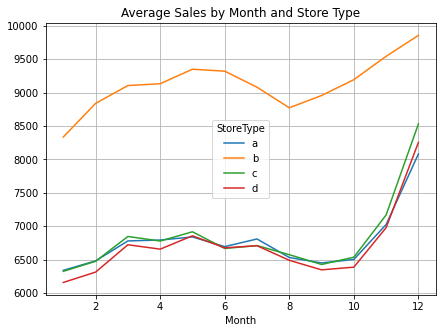

In [ ]:
stype_pivot_avg_sales.plot(kind='line', title='Average Sales by Month and Store Type', figsize=(7,5), grid=True)
plt.show()

We can see that stores of type A, C, and D closely follow very similar trends, whereas stores of type B significantly outperform them when it comes to the average number of Sales.

Now let's see how UPT compares across Store Types.

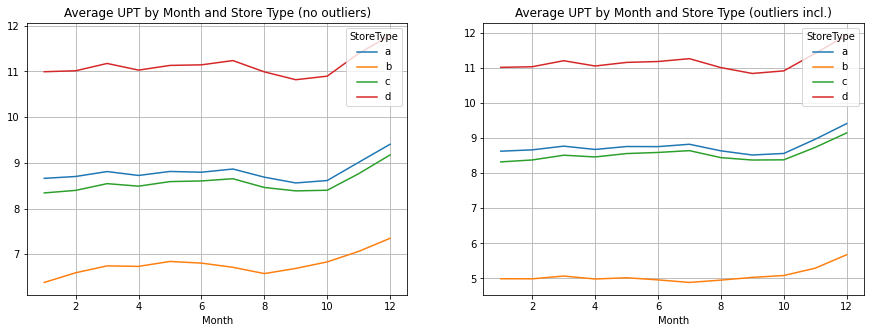

In [ ]:
stype_pivot_avg_UPT = pd.pivot_table((sales_treated[sales_treated['Year'] < 2015]), 
                                     index='Month', values='UPT', columns='StoreType', aggfunc=np.mean)
stype_pivot_avg_UPT_outliers = pd.pivot_table((sales[sales['Year'] < 2015]), 
                                     index='Month', values='UPT', columns='StoreType', aggfunc=np.mean)

fig, axes = plt.subplots(nrows=1, ncols=2)

stype_pivot_avg_UPT.plot(kind='line', title='Average UPT by Month and Store Type (no outliers)', figsize=(7,5), grid=True, ax=axes[0])
stype_pivot_avg_UPT_outliers.plot(kind='line', title='Average UPT by Month and Store Type (outliers incl.)', figsize=(7,5), grid=True, ax=axes[1])
fig.set_size_inches(15, 5)
plt.show()


Similar to our look at UPT across stores of different Assortment types, we can see that treating the outliers leaves us with a graph that more clearly shows changes in the trend of monthly sales. As we look at average UPT by StoreType, we see that while they follow similar trends, store of StoreType D see customers purchasing approximately 3 more items per purchase on average than at a type A or C store, and approximately 6 more items per purchase on average than customers at type B stores.

It seems customers of type B stores buy less items per purchase on average, but overall type B stores see more sales. It would reason that type B stores must see more customers on average to account for high average sales.

Below we look at total customers and average customers by month. We know of the different store types that there are the fewest stores of type B, so we aren't surprised to see them at the bottom of the Total Customers chart. However, if we look at average customers by store type we see that they average far more customers than the other store types.

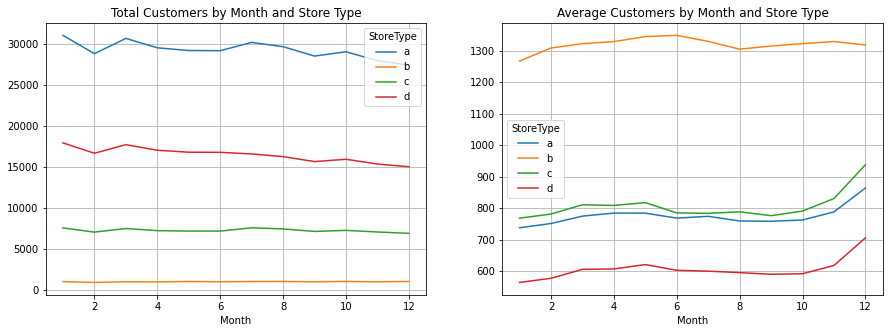

In [ ]:
stype_pivot_total_cust = pd.pivot_table((sales_treated[sales_treated['Year'] < 2015]), index='Month', columns='StoreType', values='Customers', aggfunc='count')
stype_pivot_avg_cust = pd.pivot_table((sales_treated[sales_treated['Year'] < 2015]), index='Month', columns='StoreType', values='Customers', aggfunc=np.mean)

fig, axes = plt.subplots(nrows=1, ncols=2)

stype_pivot_total_cust.plot(kind='line', title='Total Customers by Month and Store Type', figsize=(7,5), grid=True, ax=axes[0])
stype_pivot_avg_cust.plot(kind='line', title='Average Customers by Month and Store Type', figsize=(7,5), grid=True, ax=axes[1])
fig.set_size_inches(15, 5)
plt.show()

To understand a bit more about our different Store Types, let's also quickly see how they compare in relation to the Competition Distance.


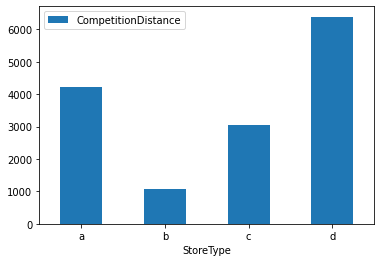

In [ ]:
stype_pivot_avg_compdist = pd.pivot_table((sales_treated[sales_treated['Year'] < 2015]),
                                         index='StoreType', values='CompetitionDistance', aggfunc=np.mean)

stype_pivot_avg_compdist.plot(kind='bar', rot=0)
plt.show()

Stores of Store Type B are significantly closer to their nearest competitor store, on average. This might suggest the Type B stores are most often in dense urban shopping areas. Perhaps with many other stores available in closer proximity, customers are less likely but multiple items at the store when they can more easily purchase additional items at other nearby stores. Let's see if there's any correlation between CompetitionDistance and UPT.

## **Question 8 : Correlation between competition distance and UPT metric?**

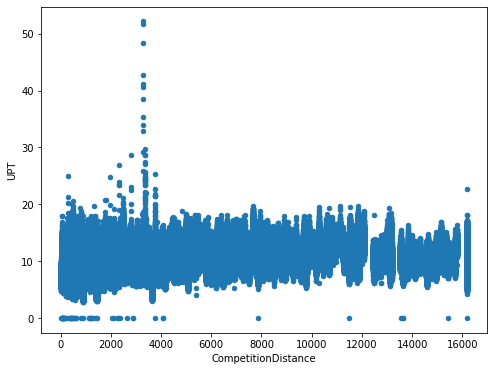

In [ ]:
sales_treated.plot(x='CompetitionDistance', y='UPT', kind='scatter', figsize=(8,6))
plt.show()

We don't see a strong positive or negative correlation between CompetitionDistance and UPT on our scatter plot, but we do see what look to be outliers in our UPT metric.

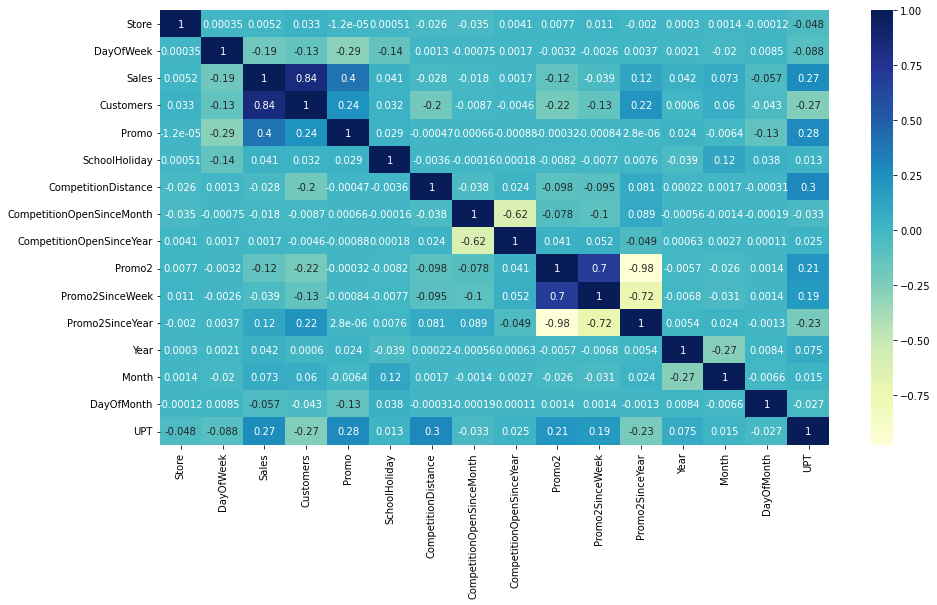

In [ ]:
corr = sales_treated.corr()

plt.figure(figsize = (15,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, center=0, cmap="YlGnBu", annot=True)
plt.show()

Looking at the correlation calculations above we don't see any meaningful correlations with CompetitionDistance. The notable correlations are a strong positive correlation between Customers and Sales, which isn't surprising. In addition, we see a smaller but positive correlation between Promo and Sales.

In [ ]:
sales_treated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Promo                      844392 non-null  int64         
 6   StateHoliday               844392 non-null  object        
 7   SchoolHoliday              844392 non-null  int64         
 8   StoreType                  844392 non-null  object        
 9   Assortment                 844392 non-null  object        
 10  CompetitionDistance        844392 non-null  float64       
 11  CompetitionOpenSinceMonth  844392 non-null  Int64  

In [ ]:
sales_treated = sales_treated.astype({"Promo2SinceWeek": int,'Promo2SinceYear':int,'CompetitionOpenSinceMonth':int,'CompetitionOpenSinceYear':int})

In [ ]:
sales_treated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Promo                      844392 non-null  int64         
 6   StateHoliday               844392 non-null  object        
 7   SchoolHoliday              844392 non-null  int64         
 8   StoreType                  844392 non-null  object        
 9   Assortment                 844392 non-null  object        
 10  CompetitionDistance        844392 non-null  float64       
 11  CompetitionOpenSinceMonth  844392 non-null  int64  

Lets take out the categorical variable names


In [ ]:
cat_cols = sales_treated.select_dtypes(include=['object']).columns
cat_cols

Index(['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], dtype='object')

In [ ]:
# lets check the value counts of each columns
for col in cat_cols:
  print(sales_treated[col].value_counts().sort_index())

0    843482
a       694
b       145
c        71
Name: StateHoliday, dtype: int64
a    457077
b     15563
c    112978
d    258774
Name: StoreType, dtype: int64
a    444909
b      8212
c    391271
Name: Assortment, dtype: int64
Feb,May,Aug,Nov      98005
Jan,Apr,Jul,Oct     242411
Mar,Jun,Sept,Dec     80669
NA                  423307
Name: PromoInterval, dtype: int64


Lest change the values of Promointerval column like Feb,May,Aug,Nov - Feb-Nov

In [ ]:
unique_val = sales_treated['PromoInterval'].unique()
unique_val

array(['NA', 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [ ]:
for val in unique_val[1:]:
  name=val.split(',')
  new_name = name[0]+'-'+name[-1]
  sales_treated.loc[sales_treated['PromoInterval']==val,'PromoInterval']=new_name


In [ ]:
sales_treated['PromoInterval'].unique()

array(['NA', 'Jan-Oct', 'Feb-Nov', 'Mar-Dec'], dtype=object)

In [ ]:
# lets one hotencode the categorical variable and save it as different database "reg_dataset"
reg_dataset = pd.get_dummies(sales_treated, columns=cat_cols, prefix=[pref for pref in cat_cols])

In [ ]:
sales_treated.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'DayOfMonth',
       'UPT'],
      dtype='object')

In [ ]:
sales_treated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Promo                      844392 non-null  int64         
 6   StateHoliday               844392 non-null  object        
 7   SchoolHoliday              844392 non-null  int64         
 8   StoreType                  844392 non-null  object        
 9   Assortment                 844392 non-null  object        
 10  CompetitionDistance        844392 non-null  float64       
 11  CompetitionOpenSinceMonth  844392 non-null  int64  

In [ ]:
columns = ['Store','DayOfWeek','DayOfMonth','Month','Year','Customers','Promo','StateHoliday_0','StateHoliday_a','StateHoliday_b','StateHoliday_c','SchoolHoliday','StoreType_a','StoreType_b','StoreType_c','StoreType_d','Assortment_a','Assortment_b','Assortment_c','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval_Feb-Nov','PromoInterval_Jan-Oct','PromoInterval_Mar-Dec','PromoInterval_NA','Sales']

As we have the Day of month , month and year as the separate column lets first drop the Date column

In [ ]:
reg_dataset.drop('Date',inplace=True,axis = 1)


As we know that UPT columns is dervied  using Customers and Sales...And our predictor variable is Sales..So we shouldn't be using UPT columns anymore as Predictor. Hence we need to drop it from the dataset.

In [ ]:
reg_dataset.drop(columns=['UPT'],inplace=True)
reg_dataset = reg_dataset[columns]
reg_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844392 non-null  int64  
 1   DayOfWeek                  844392 non-null  int64  
 2   DayOfMonth                 844392 non-null  int64  
 3   Month                      844392 non-null  int64  
 4   Year                       844392 non-null  int64  
 5   Customers                  844392 non-null  int64  
 6   Promo                      844392 non-null  int64  
 7   StateHoliday_0             844392 non-null  uint8  
 8   StateHoliday_a             844392 non-null  uint8  
 9   StateHoliday_b             844392 non-null  uint8  
 10  StateHoliday_c             844392 non-null  uint8  
 11  SchoolHoliday              844392 non-null  int64  
 12  StoreType_a                844392 non-null  uint8  
 13  StoreType_b                8

### **Lets apply the linear regression model taking whole data into consideration without identifying feature correlation**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

One Fold regression model

In [ ]:
def simple_regression(data):
  # Get the dependent and independent variable
  dependent_col = 'Sales'
  independent_cols = [col for col in data.columns if col !='Sales']
  X = data.loc[:,independent_cols].values
  y = data.loc[:,dependent_col].values.reshape(-1,1)
  # lets split the data into training set and test set
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
  # lets feature scale the data
  scaler = MinMaxScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  # lets fit the data into Linear regression model
  regression = LinearRegression()
  regression.fit(X_train,y_train)
  y_train_pred = regression.predict(X_train)
  y_test_pred = regression.predict(X_test)
  # lets check the mean squared error
  mse_train = mean_squared_error(y_train,y_train_pred)
  mse_test = mean_squared_error(y_test,y_test_pred)
  print(f'MSE train :{mse_train}')
  print(f'MSE test : {mse_test}')
  # lets see the root mean squared error
  rmse_train = np.sqrt(mse_train)
  rmse_test = np.sqrt(mse_test)
  print(f'RMSE train :{rmse_train}')
  print(f'RMSE test : {rmse_test}')
  r2 = r2_score(y_train,y_train_pred)
  print("R2_train :" ,r2)
  print("Adjusted R2_train : ",1-(1-r2_score((y_train),(y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
  r2 = r2_score(y_test,y_test_pred)
  print("R2_test :" ,r2)
  print("Adjusted R2_test : ",1-(1-r2_score((y_test),(y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
  return X,y


In [ ]:
# Get the dependent and independent variable
dependent_col = 'Sales'
independent_cols = set(reg_dataset.columns) - {dependent_col}
X = reg_dataset.loc[:,independent_cols].values
y = reg_dataset.loc[:,dependent_col].values.reshape(-1,1)

In [ ]:
# lets split the data into training set and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
# lets feature scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# lets fit the data into Linear regression model
regression = LinearRegression()
regression.fit(X_train,y_train)
y_train_pred = regression.predict(X_train)
y_test_pred = regression.predict(X_test)

In [ ]:
# lets check the mean squared error
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
print(f'MSE train :{mse_train}')
print(f'MSE test : {mse_test}')

MSE train :1262609.9905035137
MSE test : 1251172.7626584715


In [ ]:
# lets see the root mean squared error
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(f'RMSE train :{rmse_train}')
print(f'RMSE test : {rmse_test}')

RMSE train :1123.6591967778816
RMSE test : 1118.558341195698


As we got the, RMS value lets compare these error with the mean value of Sales column

In [ ]:
y_test.mean()

6835.909432197017

Lest see what is the proportion of the error wrt mean value

In [ ]:
(rmse_test/y_test.mean())*100

16.36297777626057

we can see the predicted mean data error is 7.26% of the mean value. Lets check the r2 score

In [ ]:
r2 = r2_score(y_train,y_train_pred)
print("R2_train :" ,r2)
print("Adjusted R2_train : ",1-(1-r2_score((y_train),(y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
r2 = r2_score(y_test,y_test_pred)
print("R2_test :" ,r2)
print("Adjusted R2_test : ",1-(1-r2_score((y_test),(y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2_train : 0.8291726006858687
Adjusted R2_train :  0.8291652666825258
R2_test : 0.8299046120516298
Adjusted R2_test :  0.8298753979831396


# **We can see that the r2_score for both training set and test set is nearly similar and r2_score value is also close to 1...From this we can conclude that our model not only peroformed well on training set but also performed well on test dataset.. And it shows that the model is not underfitting as well as not overfitting.**

**While splitting the data we can get such a split which may give us the good result by so to avoid such by chance result lets split up tha data in 5 part and then apply the regression model and then avarge the mean_squred error and check**

In [ ]:
X_split = np.array_split(X,5)
y_split = np.array_split(y,5)

In [ ]:
def metrics_score(test_data,pred_data,mse_values,rmse_values,r2_score_values,mae_values):
  mse = mean_squared_error(test_data,pred_data)
  rmse = math.sqrt(mean_squared_error(test_data,pred_data))
  r2_score_ = r2_score(test_data,pred_data)
  mae = np.mean(np.abs(test_data-pred_data))
  print(f'MSE is {mse}')
  print(f"RMSE is {rmse}")
  print(f"r2score is {r2_score_}")
  print(f'MAE is {mae}')
  mse_values.append(mse)
  rmse_values.append(rmse)
  r2_score_values.append(r2_score_)
  mae_values.append(mae)
  

Lets make the regression function

In [ ]:
def regression_func(X,y):
  mse_values = [] # mean squared error
  rmse_values=[] # root mean squared error
  r2_score_values = [] # r2_score
  mae_values = [] # mean absolute error
  for i in range(len(X)):
    X_test = X[i]
    y_test = y[i]
    X_train = []
    y_train = []
    for j,data in enumerate(X):
      if i!=j:
        X_train.append(data)
        y_train.append(y[j])
    X_train = np.concatenate(X_train,axis=0)
    y_train = np.concatenate(y_train,axis=0)
    regressor = LinearRegression()
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    print(f'For {i+1}st Fold')
    metrics_score(y_test,y_pred,mse_values,rmse_values,r2_score_values,mae_values)
  print(f'Final Result:')
  print(f'Mean Squared Error; {np.mean(mse_values)}')
  print(f'Root Mean Squared Error: {np.mean(rmse_values)}')
  print(f'R2 Score Values: {np.mean(r2_score_values)}')
  print(f'Mean Absolute Error: {np.mean(mae_values)}')
 






As I have already splitted X and y in 5 different dataset. Lets run cross fold validation on each fold

In [ ]:
regression_func(X_split,y_split)

For 1st Fold
MSE is 1325319.5301987163
RMSE is 1151.2252300044142
r2score is 0.8164021067836142
MAE is 876.2341518297713
For 2st Fold
MSE is 1295484.5989171711
RMSE is 1138.1935682989827
r2score is 0.8295166858501691
MAE is 881.8630900862444
For 3st Fold
MSE is 1235444.7456977814
RMSE is 1111.5056210824043
r2score is 0.8292476805235021
MAE is 853.7869031476197
For 4st Fold
MSE is 1304636.881289299
RMSE is 1142.2070220801916
r2score is 0.8303090282162331
MAE is 870.1566965311434
For 5st Fold
MSE is 1200492.3566387175
RMSE is 1095.6698209947729
r2score is 0.830034056539619
MAE is 845.0850988565318
Final Result:
Mean Squared Error; 1272275.622548337
Root Mean Squared Error: 1127.760252492153
R2 Score Values: 0.8271019115826276
Mean Absolute Error: 865.4251880902623


**From above information we can see the on every fold we got the approx 0.96 and the Avg. r2 score is 0.96 which is represent good model for prediction** 

## **Now lets have a look at the correlated features**

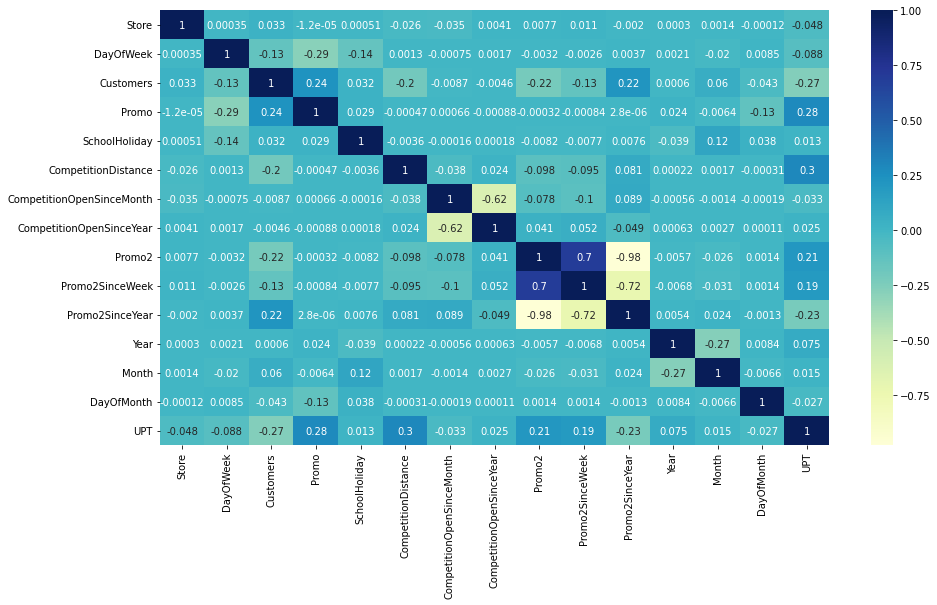

In [ ]:
exclude_col = 'Sales'
include_col = [col for col in sales_treated.columns if col !='Sales']
corr = sales_treated[include_col].corr()

plt.figure(figsize = (15,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, center=0, cmap="YlGnBu", annot=True)
plt.show()

We can observe that columns **Promo2sinceWeek** & **Promo2SinceYear**,**Promo2sinceYear** and **Promo2**,**Promo2** and **Promo2sinceweek** showing some kind of correlation... Lets plot and see them visually

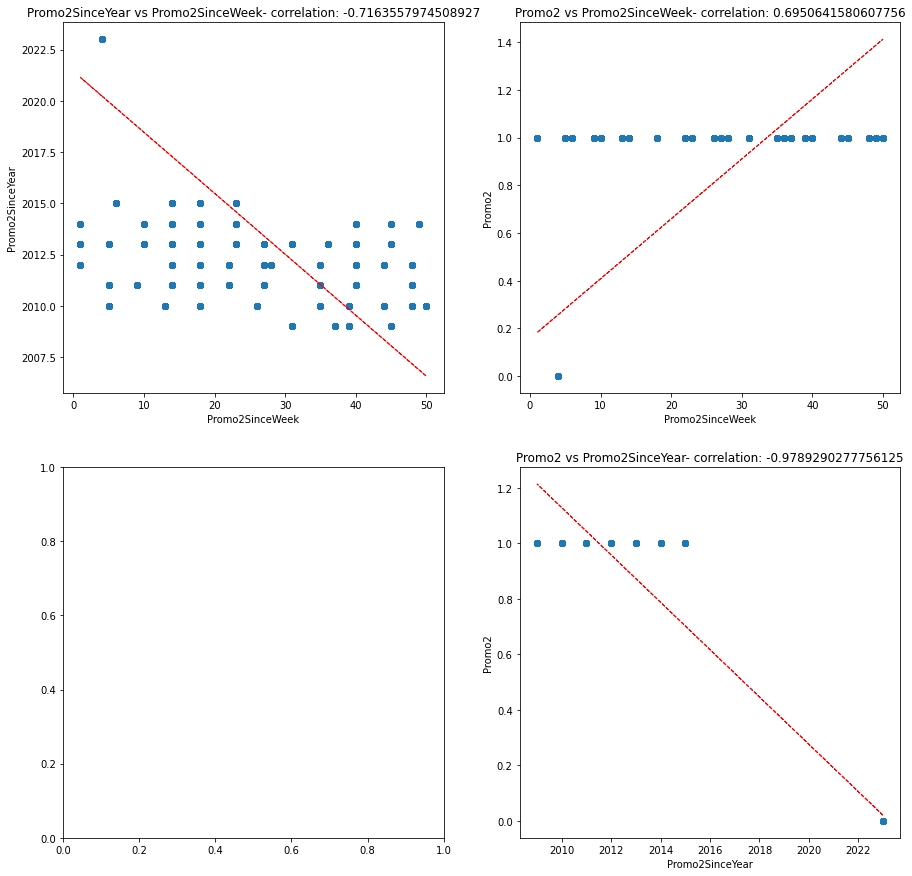

In [ ]:
correlated_columns = ['Promo2SinceWeek','Promo2SinceYear','Promo2']
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(15,15))
for i,col in enumerate(correlated_columns[:-1]):
  for j in range(i+1,len(correlated_columns)):
    feature = sales_treated[col]
    label = sales_treated[correlated_columns[j]]
    correlation = feature.corr(label)
    axes[i][j-1].scatter(x=feature, y=label)
    axes[i][j-1].set(xlabel=col, ylabel=correlated_columns[j])
    axes[i][j-1].set_title(correlated_columns[j]+ ' vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(sales_treated[col], sales_treated[correlated_columns[j]], 1)
    y_hat = np.poly1d(z)(sales_treated[col])

    axes[i][j-1].plot(sales_treated[col], y_hat, "r--", lw=1)

plt.show()

Lets check the variance inflation factor for these 3 columns.. ["Promo2","Promo2SinceYear","Promo2SinceWeek"]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
print(calc_vif(sales_treated[['Promo2','Promo2SinceYear','Promo2SinceWeek']]))
print(sales_treated['Promo2'].corr(sales_treated['Promo2SinceWeek']))
print(sales_treated['Promo2'].corr(sales_treated['Promo2SinceYear']))

         variables       VIF
0           Promo2  3.852782
1  Promo2SinceYear  2.143954
2  Promo2SinceWeek  3.800043
0.6950641580607756
-0.9789290277756125


In [ ]:
calc_vif(sales_treated[['Promo2','Promo2SinceYear','Promo2SinceWeek']])

,variables,VIF
0,Promo2,3.852782
1,Promo2SinceYear,2.143954
2,Promo2SinceWeek,3.800043


from the above results I can see that Promo2 has the highest variance inflation factor...And even promo2 has significant positive corrlation with the Promo2Since week and very high negative correlation so.... I have decided to drop the promo2 column from regression_data and make a new copy of it

In [ ]:
reg_data_clean = reg_dataset.copy()
reg_data_clean.drop(columns=['Promo2'],inplace=True)


In [ ]:
reg_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844392 non-null  int64  
 1   DayOfWeek                  844392 non-null  int64  
 2   DayOfMonth                 844392 non-null  int64  
 3   Month                      844392 non-null  int64  
 4   Year                       844392 non-null  int64  
 5   Customers                  844392 non-null  int64  
 6   Promo                      844392 non-null  int64  
 7   StateHoliday_0             844392 non-null  uint8  
 8   StateHoliday_a             844392 non-null  uint8  
 9   StateHoliday_b             844392 non-null  uint8  
 10  StateHoliday_c             844392 non-null  uint8  
 11  SchoolHoliday              844392 non-null  int64  
 12  StoreType_a                844392 non-null  uint8  
 13  StoreType_b                8

# <p>Lets apply the simple linear regression model on this cleaned dataset </p>

In [ ]:
X,y = simple_regression(reg_data_clean)

MSE train :1262959.5123144374
MSE test : 1251351.3508488326
RMSE train :1123.8147144055542
RMSE test : 1118.6381679742706
R2_train : 0.8291253114180721
Adjusted R2_train :  0.8291182283616558
R2_test : 0.8298803332082685
Adjusted R2_test :  0.8298521226623984


## From above results we can see that there is not much significant difference on the result compared to the previous results if we go by performance ..But if feature selection is our main aim in that case we should go with this model...

 <p>Lets run 5 fold cross validation</p>

In [ ]:
X_split = np.array_split(X,5)
y_split = np.array_split(y,5)

In [ ]:
regression_func(X_split,y_split)

For 1st Fold
MSE is 1325319.5301987212
RMSE is 1151.2252300044163
r2score is 0.8164021067836136
MAE is 876.2341518297683
For 2st Fold
MSE is 1295484.5989173003
RMSE is 1138.1935682990395
r2score is 0.8295166858501521
MAE is 881.8630900862128
For 3st Fold
MSE is 1235444.745697792
RMSE is 1111.505621082409
r2score is 0.8292476805235006
MAE is 853.7869031476813
For 4st Fold
MSE is 1304636.8812892735
RMSE is 1142.2070220801802
r2score is 0.8303090282162364
MAE is 870.1566965311616
For 5st Fold
MSE is 1200492.3566388197
RMSE is 1095.6698209948195
r2score is 0.8300340565396045
MAE is 845.085098856585
Final Result:
Mean Squared Error; 1272275.6225483813
Root Mean Squared Error: 1127.7602524921726
R2 Score Values: 0.8271019115826215
Mean Absolute Error: 865.4251880902818


# Lets apply the regularization model...

## **Lasso Regression**
We know that Lasso regularization is used to penalize the regression coefficints in such a way that the model should not be overfitted and to avoid multicollinerity by doing the feature selection by making the regression coefficeint of unnecessary feature close to zero sometimes even = 0. In lasso regularization, model tries to minimize the loss fucntion using aboslute sum of regression weights

Lets apply the hyperparameter tuning and try to find out the suitable alpha using **GridSearchCV**<br>


In [ ]:
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import GridSearchCV,HalvingGridSearchCV
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [ ]:
dependent_col = 'Sales'
independent_cols = set(reg_dataset.columns) - {dependent_col}
X = reg_dataset.loc[:,independent_cols].values
y = reg_dataset.loc[:,dependent_col].values.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-5,0.0003,1e-4],'max_iter':[1000]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0003, 0.0001], 'max_iter': [1000]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05, 'max_iter': 1000}

Using  {'alpha': 1e-05, 'max_iter': 1000}  the negative mean squared error is:  -1262758.6434025012


The best alpha value for lasso regression is **1e-5.** Meaning the lasso regression will not punish coefficients strictly. Rather the degree of freedomness will be more

In [ ]:
# # lets see no of features included in best model
# lasso_regressor.n_features_in_

In [ ]:

# So lets apply the lasso regularization on reg_dataset without dropping promo2 column
# Get the dependent and independent variable
def model_regression(data,alpha,model_name,l1_ratio = None):
  # Get the dependent and independent variable
  dependent_col = 'Sales'
  independent_cols = [col for col in data.columns if col != 'Sales']
  X = data.loc[:,independent_cols].values
  y = data.loc[:,dependent_col].values.reshape(-1,1)
  # lets split the data into training set and test set
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
  # lets feature scale the data
  scaler = MinMaxScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  # lets fit the data into Linear regression model
  if model_name == 'lasso':
    model  = Lasso(alpha=alpha , max_iter= 100)
  elif model_name =='ridge':
    model  = Ridge(alpha=alpha , max_iter= 3000)
  elif model_name =='elastic':
    model = ElasticNet(alpha=alpha , max_iter= 1000,l1_ratio=l1_ratio)
  model.fit(X_train,y_train)
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  # lets get the lasso score
  model_score = model.score(X_train,y_train)
  print(f'{model_name.title()} Score for Training Set : {model_score}')
  # lets check the mean squared error
  mse_train = mean_squared_error(y_train,y_train_pred)
  mse_test = mean_squared_error(y_test,y_test_pred)
  print(f'MSE train :{mse_train}')
  print(f'MSE test : {mse_test}')
  # lets see the root mean squared error
  rmse_train = np.sqrt(mse_train)
  rmse_test = np.sqrt(mse_test)
  print(f'RMSE train :{rmse_train}')
  print(f'RMSE test : {rmse_test}')
  r2_train = r2_score(y_train,y_train_pred)
  print("R2_train :" ,r2)
  print("Adjusted R2_train : ",1-(1-r2_score((y_train),(y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
  r2_test = r2_score(y_test,y_test_pred)
  print("R2_test :" ,r2)
  print("Adjusted R2_test : ",1-(1-r2_score((y_test),(y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
  return model,model_score,mse_train,mse_test,rmse_train,rmse_test,r2_train,r2_test,model.coef_,independent_cols

In [ ]:
#lets run the lasso regression with alpha=1e-5
model,lasso_score,mse_train,mse_test,rmse_train,rmse_test,r2_train,r2_test,coef,columns = model_regression(reg_dataset,1e-5,'lasso')


Lasso Score for Training Set : 0.8291750336539018
MSE train :1262592.008085251
MSE test : 1251113.8673249667
RMSE train :1123.6511950268425
RMSE test : 1118.5320144389998
R2_train : 0.8299046120516298
Adjusted R2_train :  0.8291676997550116
R2_test : 0.8299046120516298
Adjusted R2_test :  0.8298834061059761


In [ ]:
# lets check the lasso regression coef
cols = columns
df = pd.DataFrame(list(zip(cols,coef)),columns =['features','coeficients'])

In [ ]:
df

,features,coeficients
0,Store,-89.311915
1,DayOfWeek,-92.153659
2,DayOfMonth,44.610006
3,Month,332.469659
4,Year,341.000315
5,Customers,12138.544953
6,Promo,980.863152
7,StateHoliday_0,-129.347356
8,StateHoliday_a,-97.197423
9,StateHoliday_b,94.967249


We can see that the Lasso has unselected some unrelevant features by making the coef_ = 0.. And more than that Lasso performed better than Simple linear regression

# **Lets See With Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
### Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -1262758.4166334555


## **So we got the  best alpha parameter for ridge regression is 5. Which will have significant impact for penalizing the weigths**

Running the ridge regression model with alpha = 5

In [ ]:
# lets run the ridge regression with alpha= 5
model,ridge_score,mse_train,mse_test,rmse_train,rmse_test,r2_train,r2_test,coef,columns = model_regression(reg_dataset,5,'ridge')


Ridge Score for Training Set : 0.8291752605603164
MSE train :1262590.3309871552
MSE test : 1251097.5771071059
RMSE train :1123.6504487549298
RMSE test : 1118.5247324521285
R2_train : 0.8299046120516298
Adjusted R2_train :  0.8291679266711678
R2_test : 0.8299046120516298
Adjusted R2_test :  0.8298856211212906


In [ ]:
coef[0]

array([  -89.10372695,   -92.3283608 ,    44.5865707 ,   332.49227867,
         340.96282304, 12135.58378439,   981.08313133,  -266.11097737,
        -232.26405973,   -40.24725953,   538.62229662,    26.27968527,
        -131.39300349,  -572.06352062,  -303.41592989,  1006.87245473,
         707.36512092, -1737.92655052,  1030.56142893,   836.65793765,
         -32.09630216,  -881.90746559,  -206.83514805,   552.26373399,
        -723.93521877,   -79.73006888,    57.76056754,  -184.86564304,
         206.83515129])

In [ ]:
cols = columns
df = pd.DataFrame(list(zip(cols,coef[0])),columns =['features','coeficients'])
df

,features,coeficients
0,Store,-89.103727
1,DayOfWeek,-92.328361
2,DayOfMonth,44.586571
3,Month,332.492279
4,Year,340.962823
5,Customers,12135.583784
6,Promo,981.083131
7,StateHoliday_0,-266.110977
8,StateHoliday_a,-232.264060
9,StateHoliday_b,-40.247260


# **Lets Apply Elastic Net Regression**

Here **l1_ratio =1** signifies that the model elastic net has more heavily chosen **Lasso Model.**

In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [0.001,0.003,0.004],'l1_ratio':[0.9,1],'max_iter':[1000]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.003, 0.004], 'l1_ratio': [0.9, 1],
                         'max_iter': [1000]},
             scoring='neg_mean_squared_error')

Takes 31 minutes to run

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 1, 'max_iter': 1000}

Using  {'alpha': 0.001, 'l1_ratio': 1, 'max_iter': 1000}  the negative mean squared error is:  -1262758.6953926422


# **Lets  Evaluate model using Elastic Net Regression**

In [ ]:
#lets run the lasso regression with alpha=0.003
model,elastic_score,mse_train,mse_test,rmse_train,rmse_test,r2_train,r2_test,coef,columns = model_regression(reg_dataset,0.001,'elastic',1)

Elastic Score for Training Set : 0.8291753284280492
MSE train :1262589.8293669368
MSE test : 1251104.3257339278
RMSE train :1123.6502255448254
RMSE test : 1118.527749201569
R2_train : 0.8299046120516298
Adjusted R2_train :  0.8291679945418143
R2_test : 0.8299046120516298
Adjusted R2_test :  0.829884703496254


In [ ]:
cols = columns
df = pd.DataFrame(list(zip(cols,coef)),columns =['features','coeficients'])
df

,features,coeficients
0,Store,-89.111650
1,DayOfWeek,-92.139578
2,DayOfMonth,44.603491
3,Month,332.387026
4,Year,340.962481
5,Customers,12138.624807
6,Promo,980.846701
7,StateHoliday_0,-130.178366
8,StateHoliday_a,-96.933107
9,StateHoliday_b,88.236740


# As the **Elastic Regularization** is the blend of both Lasso and Ridge Regression We will use the this as our final model. Because **Lasso model** has improved a little bit than **Simple linear regression** in **feature selection** but **Ridge regression** having **alpha value** **5** is also significantly contributing towards penalizing the weigths, which could definately imact the feature selection. As the **Elastic Net Regression** has the **alpha value 0.001** greater than **Lasso regression** alpha value **0.001** can have significant regularization effect on the trained model. Hence we will be using **Elastc Net Regularization** model as our final model.

Note In all the models : r2_score is nearlly the same... So will not be comparing the model on this basis.

## **Below is designed the structure of input data in which the input should be given to get the output**

1) Store : It represents the unique id of store . It takes the integer value. (**Integer Format**)

2)DayOfWeek : It takes the values from 1 to 7 . (**Integer Format**)

3)Date : It takes the date in string format .. (dd-mm-yyyy) (**String Format**)

4) Customers : It takes the number of customers who made the transaction at that day (**Integer Format**)

5)Promo : It shows whether the store is running the Promo or not that day
Takes value 0 or 1 .. (**Integer format**)

6)StateHoliday : It has 4 option of holiday. where a = public holiday, b = Easter holiday, c = Christmas, 0 = None ('0'//'a'//'b'//'c') four options.(**String Format**)

7)SchoolHoliday : It has two values 0 or 1. (**Integer Format**)

8)StoreType : There are four types of input options .. ('a'//'b'//'c'//'d'). (**String Format**) 

9) AssortmentType : There are 3 types of assortment. ('a'//'b'//'c') .INput to be entered in (**String Format**) Describes an assortment level: a = basic, b = extra, c = extended

10)Competiton Distance : distance in meters to the nearest competitor store
    Input should be in    (**Float Value**) format

11)CompetitionOpenSinceMonth : It takesvalues from 1 to 12. (**Integer Format**)

12)CompetitionOPenSinceYear : Takes the year from which Competition has been started (**Integer format**)

13)Promo2:Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating. It take the value 0 or 1. (**INteger Format**)

14)Promo2SinceWeek : It takes values from 1 to 4 (**Integer Format**)

15)Promo2SinceYear : Takes the year from which Promo2 has been started (**Integer format**)

16)PromoInterval : ['NA' // 'Jan,Apr,Jul,Oct' // 'Feb,May,Aug,Nov' //'Mar,Jun,Sept,Dec']... Takes input anyone among the four options.. ("String Format")




In [ ]:
sample_input = [1,5,'15-07-2014',300,1,'0',0,'a','b',12000,3,2014,1,3,2015,'Jan,Apr,Jul,Oct']

# **Below is the function to clean the sample input which will be used fro predicting the sales Price.**

In [ ]:
from datetime import datetime
def sales_predictor(inputs):
  cleaned_input = []
  for i in range(len(inputs)):
    if i==2:
      dt =datetime.strptime(inputs[i], '%d-%m-%Y')
      cleaned_input.append(dt.day)
      cleaned_input.append(dt.month)
      cleaned_input.append(dt.year)
    elif i==5:
      holidays = {'0':[1,0,0,0],'a':[0,1,0,0],'b':[0,0,1,0],'c':[0,0,0,1]}
      cleaned_input.extend(holidays[inputs[i]])
    elif i ==7:
      s_type = {'a':[1,0,0,0],'b':[0,1,0,0],'c':[0,0,1,0],'d':[0,0,0,1]}
      cleaned_input.extend(s_type[inputs[i]])
    elif i==8:
      a_type = {'a':[1,0,0],'b':[0,1,0],'c':[0,0,1]}
      cleaned_input.extend(a_type[inputs[i]])
    elif i == 15:
      #'NA' // 'Jan,Apr,Jul,Oct' // 'Feb,May,Aug,Nov' //'Mar,Jun,Sept,Dec'
      promo_int = {'Jan,Apr,Jul,Oct':[0,1,0,0],'Feb,May,Aug,Nov':[1,0,0,0],'Mar,Jun,Sept,Dec':[0,0,1,0],'NA':[0,0,0,1]}
      cleaned_input.extend(promo_int[inputs[i]])
    else:
      cleaned_input.append(inputs[i])
    # feature scaling the cleaned input
  
  cleaned_input = scaler.fit_transform(np.array(cleaned_input).reshape(-1,1))
  cleaned_input = cleaned_input.reshape(1,29)
  sales_price = model.predict(cleaned_input)
  return sales_price[0],cleaned_input
    



In [ ]:
sales_predictor(sample_input)[0]

2576.337208838942

In [ ]:
import pickle

In [ ]:
#with open(working_directory_path+'model_pickle','wb') as f:
#  pickle.dump(model,f)

In [ ]:
with open(working_directory_path+'model_pickle','rb') as f:
  mod = pickle.load(f)

In [ ]:
mod.predict(X_test[24,:].reshape(1,-1))

array([9390.68298164])

In [ ]:
y_test[24]

array([9203])

# **Conclusion**

**1)**When looking at key performance indicators across store Assortments and Store Types we see they follow similar monthly trends, but numbers can vary by Assortment and Store Type.

**2)**When looking at store Assortment we found that stores of Assortment Type B represent a small share of total sales, which isn’t surprising considering less than 1% of stores are of the Type B assortment. However, when looking at average monthly sales we see the Assortment Type B stores out performing types A and C by a large margin. Looking at the number of units sold per transaction, UPT, we see Assortment Type A and C stores performing better than Type B.

**3)**A similar investigation into sales by Store Type also saw noticeable differences between Store Type B and Store Types A, C, and D. Again, Type B is the least common Store Type, representing only 1.8% of stores sampled from 2013-2014. And yet, similar to Assortment Type B, Store Type B also vastly outperforms other Store Types when looking at average monthly sales. Following the similarities, it also lags to the bottom when we compare UPT amongst Store Types.

**4)**In trying to further investigate that difference between average sales and average UPT for Store Type B, we looked at average customers by Store Type and found Type B to be well ahead of the others. This suggests that Type B stores on average have more customers visit, but they buy a smaller number of items. In looking at the average distance of the nearest competitor by store type we found that Type B stores were far closer to their nearest competitor store on average. This lead us to hypothesize that Type B stores may be concentrated in dense urban areas that see more foot traffic.

**5)**Further along that line of investigation, we looked for any correlations with competition distance, but found no strong correlations. Looking at correlations across our complete data set we only found the expected strong correlation between Customers and Sales, and smaller correlations between Promo and Sales.

**6)**We conclude that well Store Type B and store Assortment B represent a very small sample of the stores, they significantly outperform other store types and assortments in average sales, despite a lower UPT, and see a high volume of customers. It could be worthwhile investigating expanding into more Type B Stores and Assortments.

**7)**)Finally we applied the various regression models , Simple Linear regression, Lasso,Ridge and 
Elastic net regression. After evaluating their metrics we finally chose to go with Elastic Net Regression.


# **Hurrah we have successfully completed our Regression Capstone Project...**